# Lab Assignment Five: Wide and Deep Network Architectures
- Group: `Lab One 3`
    - Salissa Hernandez
    - Juan Carlos Dominguez
    - Leonardo Piedrahita
    - Brice Danvide

Dataset:
- https://www.kaggle.com/datasets/mysarahmadbhat/mercedes-used-car-listing


# **1. Preparation**

## **1.1 Defining & Preparing Class Variables**

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import missingno as mn
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Scikit-Learn
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, silhouette_score
from sklearn.decomposition import PCA
from scipy import stats
from scipy.stats import ttest_rel, wilcoxon

# Tensorflow Keras
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input, concatenate
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../../Data/merc.csv')
df.head(10)

model  year   price transmission  mileage fuelType  tax   mpg  \
0         SLK  2005    5200    Automatic    63000   Petrol  325  32.1   
1     S Class  2017   34948    Automatic    27000   Hybrid   20  61.4   
2    SL CLASS  2016   49948    Automatic     6200   Petrol  555  28.0   
3     G Class  2016   61948    Automatic    16000   Petrol  325  30.4   
4     G Class  2016   73948    Automatic     4000   Petrol  325  30.1   
5    SL CLASS  2011  149948    Automatic     3000   Petrol  570  21.4   
6   GLE Class  2018   30948    Automatic    16000   Diesel  145  47.9   
7     S Class  2012   10948    Automatic   107000   Petrol  265  36.7   
8     G Class  2019  139948    Automatic    12000   Petrol  145  21.4   
9   GLA Class  2017   19750    Automatic    15258   Diesel   30  64.2   

   engineSize  
0         1.8  
1         2.1  
2         5.5  
3         4.0  
4         4.0  
5         6.2  
6         2.1  
7         3.5  
8         4.0  
9         2.1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [4]:
df.describe()

year          price        mileage           tax           mpg  \
count  13119.000000   13119.000000   13119.000000  13119.000000  13119.000000   
mean    2017.296288   24698.596920   21949.559037    129.972178     55.155843   
std        2.224709   11842.675542   21176.512267     65.260286     15.220082   
min     1970.000000     650.000000       1.000000      0.000000      1.100000   
25%     2016.000000   17450.000000    6097.500000    125.000000     45.600000   
50%     2018.000000   22480.000000   15189.000000    145.000000     56.500000   
75%     2019.000000   28980.000000   31779.500000    145.000000     64.200000   
max     2020.000000  159999.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  13119.000000  
mean       2.071530  
std        0.572426  
min        0.000000  
25%        1.800000  
50%        2.000000  
75%        2.100000  
max        6.200000

In [5]:
# Returns the dimensions of the dataframe as (number of rows, number of columns)
df.shape

(13119, 9)

In [6]:
# Returns an index object containing the col labels of the dataframe
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [7]:
# Clean column names: make them lowercase and replace spaces with underscores
df.columns = df.columns.str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True).str.lower()

# Check the updated column names
print(df.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuel_type', 'tax',
       'mpg', 'engine_size'],
      dtype='object')


### Checking for Duplicate Values

In [8]:
# Checking for duplicates
duplicates_before = df.duplicated().sum()
print(f'Duplicates before dropping: {duplicates_before}')

Duplicates before dropping: 259


In [9]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [10]:
# No more duplicates!
duplicates_after = df.duplicated().sum()
print(f'Duplicates after dropping: {duplicates_after}')

Duplicates after dropping: 0


### Checking for Missing/Null Values

<Axes: >

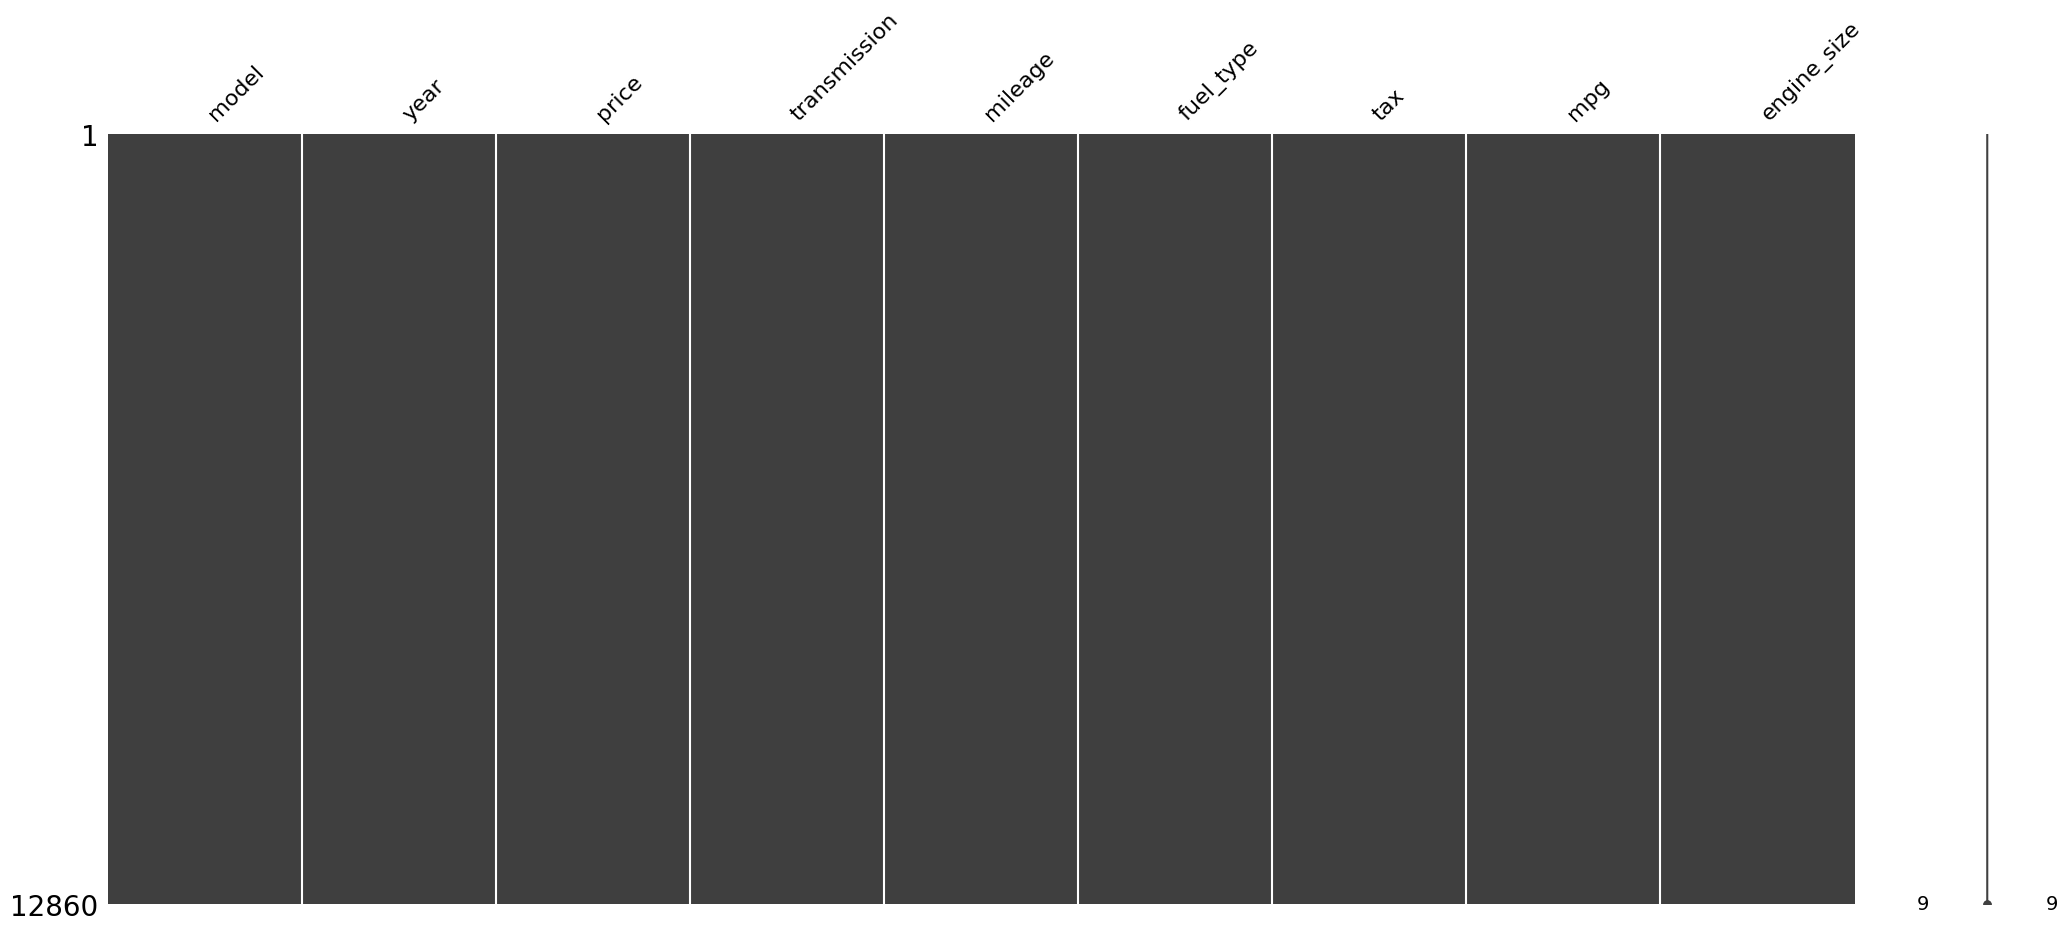

In [11]:
# Show missing data
mn.matrix(df)

In [12]:
# Checking for null values
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuel_type       0
tax             0
mpg             0
engine_size     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12860 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         12860 non-null  object 
 1   year          12860 non-null  int64  
 2   price         12860 non-null  int64  
 3   transmission  12860 non-null  object 
 4   mileage       12860 non-null  int64  
 5   fuel_type     12860 non-null  object 
 6   tax           12860 non-null  int64  
 7   mpg           12860 non-null  float64
 8   engine_size   12860 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1004.7+ KB


### Checking for Outliers

In [14]:
# Checking For Outliers
df.describe()

year          price        mileage           tax           mpg  \
count  12860.000000   12860.000000   12860.000000  12860.000000  12860.000000   
mean    2017.267963   24636.426361   22169.588336    129.843701     55.197535   
std        2.226127   11874.220447   21077.039295     65.580514     15.181133   
min     1970.000000     650.000000       1.000000      0.000000      1.100000   
25%     2016.000000   17309.750000    6494.000000    125.000000     45.600000   
50%     2018.000000   22299.000000   15448.500000    145.000000     56.500000   
75%     2019.000000   28971.250000   32000.000000    145.000000     64.200000   
max     2020.000000  159999.000000  259000.000000    580.000000    217.300000   

        engine_size  
count  12860.000000  
mean       2.075381  
std        0.573434  
min        0.000000  
25%        1.800000  
50%        2.000000  
75%        2.100000  
max        6.200000

In [15]:
# Defines upper and lower bounds for each column
df = df[
    (df['price'] >= 1000) & (df['price'] <= 60000) &         # Filter price between 1,000 and 60,000
    (df['mileage'] <= 150000) &                              # Filter mileage below 150,000
    (df['tax'] <= 300) &                                     # Filter tax below 300
    (df['mpg'] >= 10) & (df['mpg'] <= 100) &                 # Filter mpg between 10 and 100
    (df['engine_size'] > 0) & (df['engine_size'] <= 5)         # Filter engineSize between 0 and 5 liters
]

In [16]:
# Outliers Removed!
df.describe()

year         price        mileage           tax           mpg  \
count  12351.000000  12351.000000   12351.000000  12351.000000  12351.000000   
mean    2017.353494  23891.015707   21743.589507    126.171160     55.067776   
std        1.953895   9455.640104   19996.533334     54.209434     11.558749   
min     1997.000000   1350.000000       1.000000      0.000000     24.600000   
25%     2016.000000  17299.000000    6620.500000    125.000000     46.300000   
50%     2018.000000  22156.000000   15329.000000    145.000000     56.500000   
75%     2019.000000  28480.000000   31549.000000    145.000000     64.200000   
max     2020.000000  59999.000000  150000.000000    300.000000     80.700000   

        engine_size  
count  12351.000000  
mean       2.027107  
std        0.463277  
min        1.300000  
25%        1.600000  
50%        2.000000  
75%        2.100000  
max        4.700000

### Evaluation of Filtering Criteria

**Objective**: The goal of the filtering criteria is to eliminate outliers that could skew the analysis and predictive modeling of car prices based on various attributes, such as price, mileage, and engine size.

#### 1. **Price Filter**: 
   - **Criteria**: Price is filtered between €1,000 and €60,000.
   - **Rationale**: 
     - **Lower Bound**: Setting a minimum price of €1,000 helps exclude listings that may be erroneous (e.g., missing data or extreme discounts).
     - **Upper Bound**: The maximum price of €60,000 is aimed at excluding luxury and exotic cars that may not represent the typical market for used Mercedes vehicles. The mean price post-filtering is €23,891, indicating that the filtered dataset contains more reasonably priced vehicles.

#### 2. **Mileage Filter**: 
   - **Criteria**: Mileage is capped at 150,000 km.
   - **Rationale**: 
     - High mileage often indicates extensive use and potential wear, which could correlate negatively with price. By limiting mileage to a maximum of 150,000 km, the dataset now represents vehicles that are more commonly sold in the used car market, improving the relevance of the data for predictive modeling. The mean mileage remains within a practical range (21,743 km).

#### 3. **Tax Filter**: 
   - **Criteria**: Tax is limited to a maximum of €300.
   - **Rationale**: 
     - This upper bound ensures that extremely high taxes, which might apply to specialty vehicles or those with high emissions, are excluded. The average tax remains reasonable at €126, supporting the filtering effectiveness.

#### 4. **MPG Filter**: 
   - **Criteria**: MPG is filtered between 10 and 100.
   - **Rationale**: 
     - Setting a minimum of 10 MPG avoids extremely inefficient vehicles that may not be practical for buyers. The maximum of 100 MPG is a logical upper limit, as cars with exceptionally high MPG are often hybrids or very efficient models that may skew predictions. The mean MPG of 55.07 suggests that the dataset retains efficient vehicles.

#### 5. **Engine Size Filter**: 
   - **Criteria**: Engine size is limited to between 0 and 5 liters.
   - **Rationale**: 
     - This range encompasses the vast majority of passenger vehicles while excluding high-performance or commercial vehicles that fall outside the typical used car market. The mean engine size of 2.03 liters is consistent with average passenger vehicles.

### Conclusion

The filtering criteria employed appear to be effective in removing outliers and retaining a dataset that is representative of the used car market. The adjustments made through these criteria led to a more focused dataset, evidenced by reasonable means and ranges for each variable.


In [17]:
# Resetting the index
df = df.reset_index(drop=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12351 entries, 0 to 12350
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         12351 non-null  object 
 1   year          12351 non-null  int64  
 2   price         12351 non-null  int64  
 3   transmission  12351 non-null  object 
 4   mileage       12351 non-null  int64  
 5   fuel_type     12351 non-null  object 
 6   tax           12351 non-null  int64  
 7   mpg           12351 non-null  float64
 8   engine_size   12351 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 868.6+ KB


### Visualizations for Categorical Attributes

#### Transmission

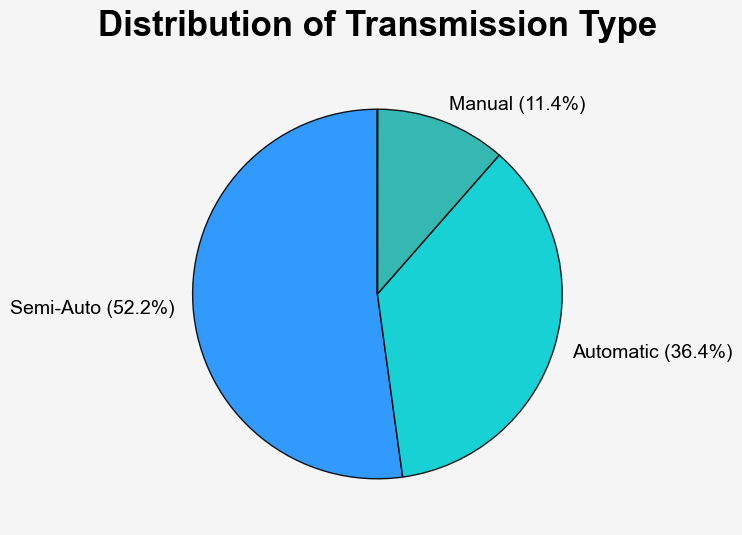

In [19]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Define colors
colors = ['#1E90FF', '#00CED1', '#20B2AA', '#3CB371', '#4682B4', '#5F9EA0', '#87CEEB', '#00BFFF']
transmission_counts = df.transmission.value_counts()

# Filter out categories with zero counts (if any)
transmission_counts = transmission_counts[transmission_counts > 0]

# Calculate percentages
percentages = 100 * transmission_counts / transmission_counts.sum()

# Create labels with percentages, hiding those below 1%
labels = []
for label, pct in zip(transmission_counts.index, percentages):
    if pct < 1:
        labels.append("")  # Set empty for small percentages
    else:
        labels.append(f"{label} ({pct:.1f}%)")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the pie chart
wedges, texts = ax.pie(transmission_counts, 
                        labels=labels, 
                        startangle=90, 
                        colors=colors[:len(transmission_counts)],
                        wedgeprops=dict(edgecolor='black', alpha=0.9))

# Style the text labels
for text in texts:
    text.set_fontsize(14)
    text.set_color('black')

# Set the title
plt.title('Distribution of Transmission Type', fontsize=25, fontweight='bold', color='black', pad=20)

# Optional: Customize the figure background color
fig.patch.set_facecolor('#f6f5f5')

# Display the pie chart
plt.show()

#### Model

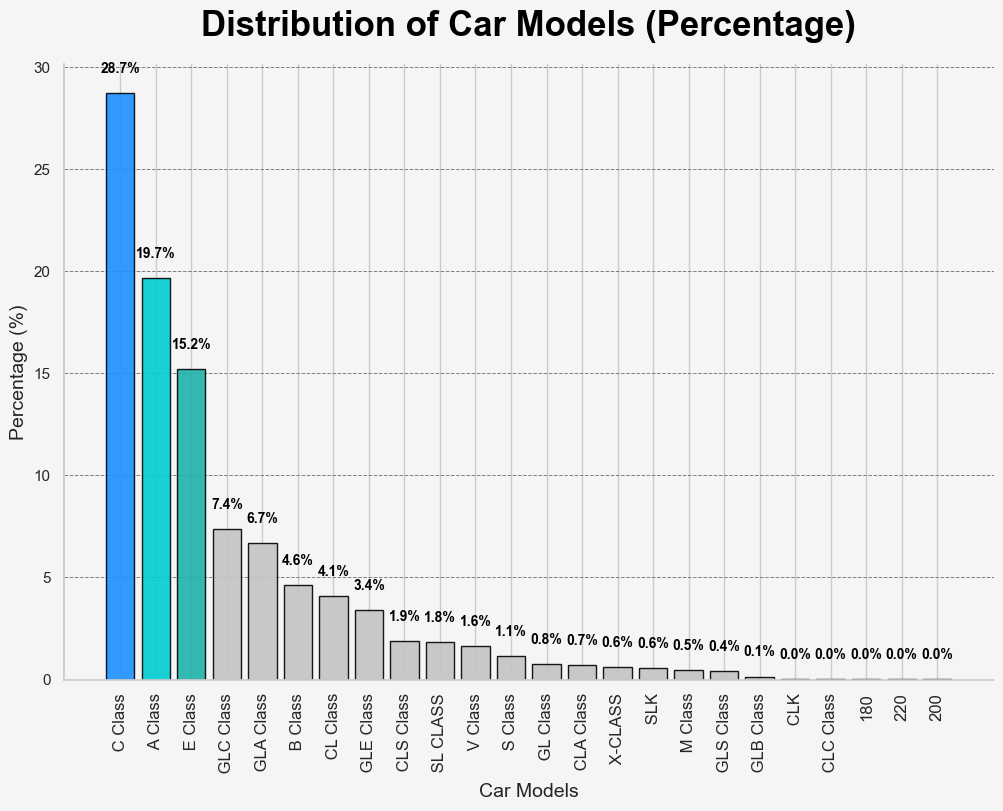

In [20]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Get counts for all models
model_counts = df.model.value_counts()
total_counts = model_counts.sum()

# Calculate percentages
percentages = (model_counts / total_counts) * 100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Determine colors: unique colors for the top three percentages, grey for the rest
colors = ['#1E90FF', '#00CED1', '#20B2AA']  # Distinct colors for the top three
grey_color = '#c4c4c4'  # Grey for the rest
bar_colors = [grey_color] * len(percentages)

# Get indices of the top three models
top_three_indices = percentages.nlargest(3).index
for i in range(len(percentages)):
    if percentages.index[i] in top_three_indices:
        bar_colors[i] = colors.pop(0)  # Assign a distinct color

# Create vertical bars
bars = ax.bar(percentages.index, percentages.values, color=bar_colors, alpha=0.9, edgecolor='black')

# Add annotations for the percentage labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', 
            ha='center', fontsize=10, fontweight='bold', color='black')  # Set fontsize to 10

# Set the title
plt.title('Distribution of Car Models (Percentage)', fontsize=25, fontweight='bold', color='black', pad=20)

# Customize the axes
ax.set_xlabel('Car Models', fontsize=14)
ax.set_ylabel('Percentage (%)', fontsize=14)

# Rotate x-tick labels to vertical for better alignment
plt.xticks(rotation=90, ha='center', fontsize=12)  # Set rotation to 90 for vertical

# Optional: Customize the figure background color
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# Add gridlines for better readability
ax.yaxis.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray')

# Hide the spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### Engine Size

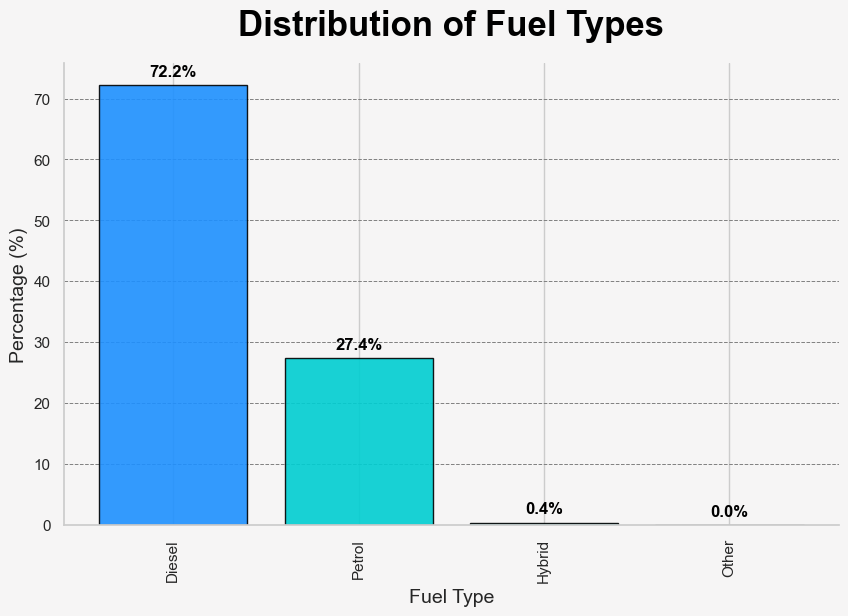

In [21]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Define a cooler color palette
colors = ['#1E90FF', '#00CED1', '#20B2AA'] + ['#c4c4c4'] * 5  # Grey for the rest

# Get counts for fuel types
fuel_counts = df.fuel_type.value_counts()

# Calculate percentages
fuel_percentages = (fuel_counts / fuel_counts.sum()) * 100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create vertical bars
bars = ax.bar(fuel_percentages.index, fuel_percentages.values, color=colors[:len(fuel_percentages)], alpha=0.9, edgecolor='black')

# Add annotations for the percentage labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', 
            ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Set the title
plt.title('Distribution of Fuel Types', fontsize=25, fontweight='bold', color='black', pad=20)

# Customize the x and y axis
ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_xlabel('Fuel Type', fontsize=14)

# Optional: Customize the figure background color
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# Add gridlines for better readability
ax.yaxis.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray')

# Hide the spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate the x labels to be vertical
plt.xticks(rotation=90)

plt.show()

### Visualizations for Numerical Attributes

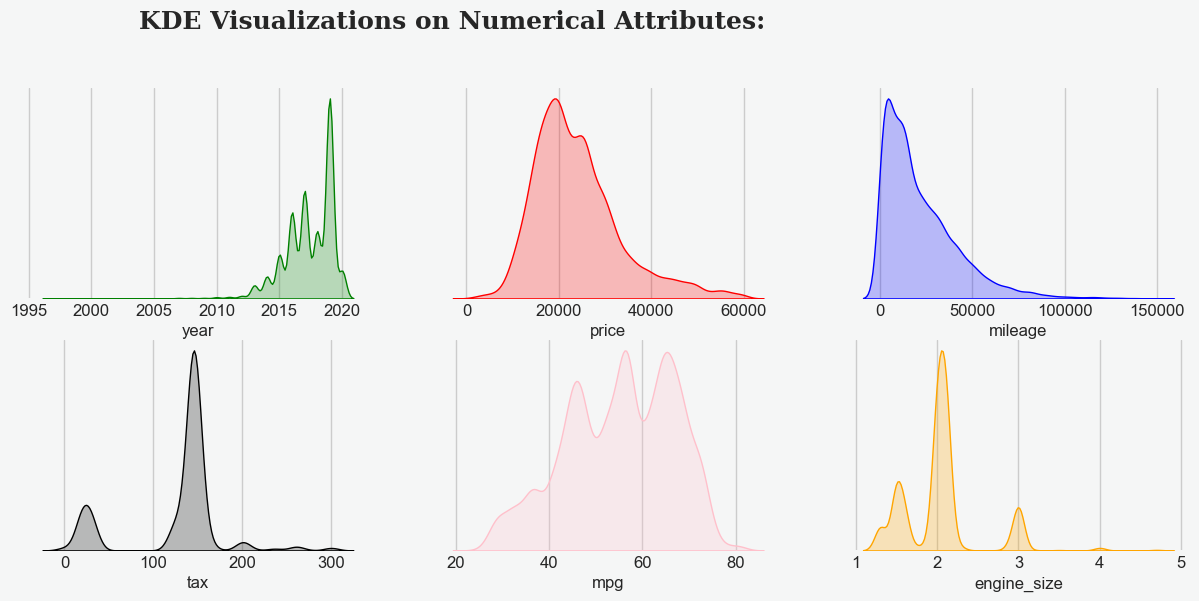

In [22]:
# Set up the figure
fig = plt.figure(figsize=(15, 6))
fig.patch.set_facecolor('#f5f6f6')

# Create a grid for the subplots
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.2)

# Create subplots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

axes = [ax0, ax1, ax2, ax3, ax4, ax5]
for ax in axes:
    ax.set_facecolor('#f5f6f6')
    ax.tick_params(axis='x', labelsize=12, which='major', direction='out', pad=2, length=1.5)
    ax.tick_params(axis='y', colors='black')
    ax.axes.get_yaxis().set_visible(False)

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

# Select numerical columns
cols = df.select_dtypes(exclude='object').columns

# Plot KDE for each numerical attribute
sns.kdeplot(x=df[cols[0]], color="green", fill=True, ax=ax0)
sns.kdeplot(x=df[cols[1]], color="red", fill=True, ax=ax1)
sns.kdeplot(x=df[cols[2]], color="blue", fill=True, ax=ax2)
sns.kdeplot(x=df[cols[3]], color="black", fill=True, ax=ax3)
sns.kdeplot(x=df[cols[4]], color="pink", fill=True, ax=ax4)
sns.kdeplot(x=df[cols[5]], color="orange", fill=True, ax=ax5)

# Add titles and texts
fig.text(0.2, 0.98, "KDE Visualizations on Numerical Attributes:", **{'font': 'serif', 'size': 18, 'weight': 'bold'}, alpha=1)

plt.show()

### Encoding the Target Attribute: `price`

In [23]:
# Define bins and labels
bins = [0, 10000, 20000, 30000, 40000, 50000, df['price'].max()]
labels = ['Budget', 'Affordable', 'Mid-Range', 'High-End', 'Premium', 'Luxury']

# Use pd.cut to bin the 'price' and assign categories with an explicit order
df['price'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Explicitly define the order of the categories
ordered_labels = pd.Categorical(df['price'], categories=labels, ordered=True)

# Assign the ordered categories back to the 'price' column
df['price'] = ordered_labels

# Now, manually encode the categories as integers
df['price_encoded'] = df['price'].cat.codes

# Check the unique values in the encoded 'price' column
print("Encoded 'price' values:")
print(df['price_encoded'].unique())

# Check the mapping of the labels to the encoded values
price_mapping = dict(zip(df['price'].cat.categories, range(len(df['price'].cat.categories))))
print("\nPrice Category Encoding Mapping:", price_mapping)


Encoded 'price' values:
[3 1 2 5 0 4]

Price Category Encoding Mapping: {'Budget': 0, 'Affordable': 1, 'Mid-Range': 2, 'High-End': 3, 'Premium': 4, 'Luxury': 5}


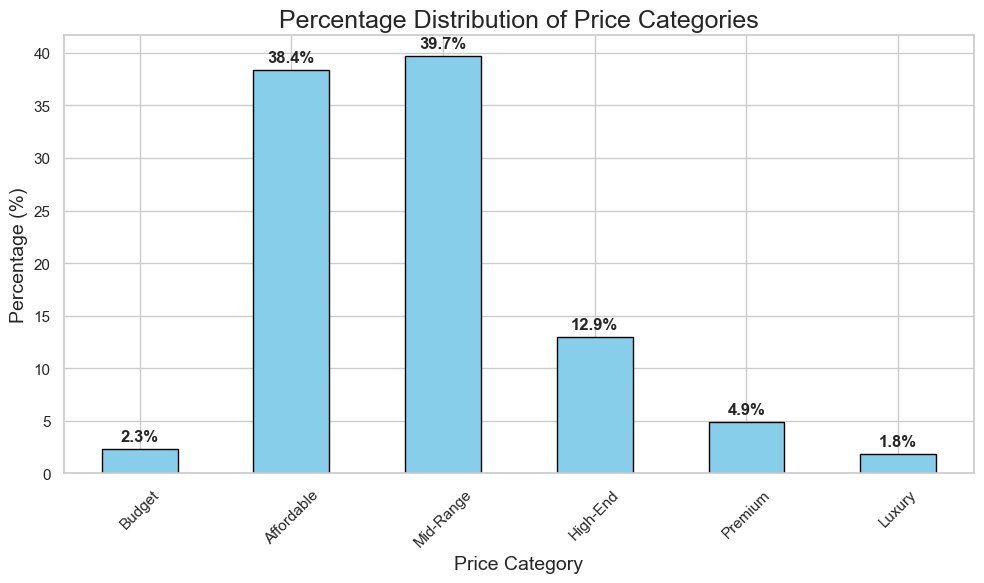

In [24]:
# Get the counts of the encoded 'price' values
price_category_counts = df['price_encoded'].value_counts(normalize=True) * 100  # Normalize to get percentages

# Get the labels corresponding to the numeric encoding
price_labels = df['price'].cat.categories  # Get the price categories

# Sort the price_category_counts so it matches the order of price_labels
price_category_counts = price_category_counts.sort_index()  # Sort by index to match the category order

# Plot a bar chart
plt.figure(figsize=(10, 6))
price_category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Percentage Distribution of Price Categories', fontsize=18)
plt.xlabel('Price Category', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Set the x-ticks to the correct category labels
plt.xticks(ticks=range(len(price_labels)), labels=price_labels, rotation=45)

# Show percentage values on each bar
for index, value in enumerate(price_category_counts):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


### Encoding Categorical Attributes

#### Model

In [25]:
# Remove leading and trailing spaces from the 'model' column
df['model'] = df['model'].str.strip()

# Sort the categories alphabetically
sorted_labels = sorted(df['model'].unique())

# Create a Categorical type with sorted categories
df['model'] = pd.Categorical(df['model'], categories=sorted_labels, ordered=True)

# Encode the 'model' column
df['model_encoded'] = df['model'].cat.codes

# Check the mapping of the labels to the encoded values
model_mapping = dict(zip(df['model'].cat.categories, range(len(df['model'].cat.categories))))
print("\nModel Encoding Mapping:", model_mapping)



Model Encoding Mapping: {'180': 0, '200': 1, '220': 2, 'A Class': 3, 'B Class': 4, 'C Class': 5, 'CL Class': 6, 'CLA Class': 7, 'CLC Class': 8, 'CLK': 9, 'CLS Class': 10, 'E Class': 11, 'GL Class': 12, 'GLA Class': 13, 'GLB Class': 14, 'GLC Class': 15, 'GLE Class': 16, 'GLS Class': 17, 'M Class': 18, 'S Class': 19, 'SL CLASS': 20, 'SLK': 21, 'V Class': 22, 'X-CLASS': 23}


#### Transmission

In [26]:
# Create a Categorical type with the unique transmission values in the original order
df['transmission'] = pd.Categorical(df['transmission'], ordered=True)

# Encode the 'transmission' column
df['transmission_encoded'] = df['transmission'].cat.codes

# Check the unique encoded 'transmission' values
print("Encoded 'transmission' values:")
print(df['transmission_encoded'].unique())

# Check the mapping of the labels to the encoded values
transmission_mapping = dict(zip(df['transmission'].cat.categories, range(len(df['transmission'].cat.categories))))
print("\nTransmission Encoding Mapping:", transmission_mapping)


Encoded 'transmission' values:
[0 1 3 2]

Transmission Encoding Mapping: {'Automatic': 0, 'Manual': 1, 'Other': 2, 'Semi-Auto': 3}


#### Fuel Type

In [27]:
# Create a Categorical type with the unique fuel types in the original order
df['fuel_type'] = pd.Categorical(df['fuel_type'], ordered=True)

# Encode the 'fuel_type' column
df['fuel_type_encoded'] = df['fuel_type'].cat.codes

# Check the mapping of the labels to the encoded values
fuel_type_mapping = dict(zip(df['fuel_type'].cat.categories, range(len(df['fuel_type'].cat.categories))))
print("\nFuel Type Encoding Mapping:", fuel_type_mapping)


Fuel Type Encoding Mapping: {'Diesel': 0, 'Hybrid': 1, 'Other': 2, 'Petrol': 3}


### Encoding Numerical Attributes

#### MPG

In [28]:
# Check the range of 'mpg' values
print("Minimum mpg value:", df['mpg'].min())
print("Maximum mpg value:", df['mpg'].max())

# Define new bin edges that cover the entire range of 'mpg' values
bins = [0, 25, 35, 45, 55, 65, 75, 85]  # Adjust these based on the actual range
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Excellent', 'Top Tier']

# Create a new column in the DataFrame for the binned mpg values
df['mpg_binned'] = pd.cut(df['mpg'], bins=bins, labels=labels, right=False)

# Check the distribution after binning
print(df['mpg_binned'].value_counts(dropna=False))

# Define ordered categories and encode them
df['mpg_binned'] = pd.Categorical(df['mpg_binned'], categories=labels, ordered=True)
df['mpg_encoded'] = df['mpg_binned'].cat.codes  # -1 will appear if there are values outside the bins

# Check the unique encoded 'mpg' values and their mapping
mpg_mapping = dict(zip(df['mpg_binned'].cat.categories, range(len(df['mpg_binned'].cat.categories))))
print("\nMPG Encoding Mapping:", mpg_mapping)

# Display the encoded values distribution
print(df['mpg_encoded'].value_counts())


Minimum mpg value: 24.6
Maximum mpg value: 80.7
mpg_binned
Very High    3846
High         2953
Excellent    2869
Medium       1924
Low           674
Top Tier       83
Very Low        2
Name: count, dtype: int64

MPG Encoding Mapping: {'Very Low': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4, 'Excellent': 5, 'Top Tier': 6}
mpg_encoded
4    3846
3    2953
5    2869
2    1924
1     674
6      83
0       2
Name: count, dtype: int64


#### Year

In [29]:
# Define bins and labels for decades
year_bins = [1990, 2000, 2010, 2020, 2030]  # Adjusted to cover the full range of years
year_labels = ['1990s', '2000s', '2010s', '2020s']

# Create a new column in the DataFrame for the binned year values
df['year_binned'] = pd.cut(df['year'], bins=year_bins, labels=year_labels, right=False)

# Check the distribution after binning
print(df['year_binned'].value_counts(dropna=False))

# Define ordered categories and encode them
df['year_binned'] = pd.Categorical(df['year_binned'], categories=year_labels, ordered=True)
df['year_encoded'] = df['year_binned'].cat.codes  # -1 will appear if there are values outside the bins

# Check the unique encoded year values and their mapping
year_mapping = dict(zip(df['year_binned'].cat.categories, range(len(df['year_binned'].cat.categories))))
print("\nYear Encoding Mapping:", year_mapping)

# Display the encoded values distribution
print(df['year_encoded'].value_counts())


year_binned
2010s    11717
2020s      586
2000s       43
1990s        5
Name: count, dtype: int64

Year Encoding Mapping: {'1990s': 0, '2000s': 1, '2010s': 2, '2020s': 3}
year_encoded
2    11717
3      586
1       43
0        5
Name: count, dtype: int64


#### Engine Size

In [30]:
scaler = StandardScaler()
df['engine_size_scaled'] = scaler.fit_transform(df[['engine_size']])

#### Tax

In [31]:
# Adjust bin edges and labels to ensure coverage of all values
tax_bins = [0, 50, 100, 150, 250, 301]  # Adjust as needed to cover the entire range
tax_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Apply binning with adjusted bins
df['tax_binned'] = pd.cut(df['tax'], bins=tax_bins, labels=tax_labels, right=False)

# Re-encode the binned values
df['tax_binned'] = pd.Categorical(df['tax_binned'], categories=tax_labels, ordered=True)
df['tax_encoded'] = df['tax_binned'].cat.codes

# Check the unique encoded tax values and their mapping
tax_mapping = dict(zip(df['tax_binned'].cat.categories, range(len(df['tax_binned'].cat.categories))))
print("\ntax Encoding Mapping:", tax_mapping)

# Check the distribution of 'tax_encoded' after binning and encoding
print(df['tax_encoded'].value_counts())


tax Encoding Mapping: {'Very Low': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
tax_encoded
2    8300
0    2298
3    1499
4     254
Name: count, dtype: int64


#### Mileage

In [32]:
scaler = StandardScaler()
df['mileage_scaled'] = scaler.fit_transform(df[['mileage']])

In [33]:
# Dropping Attributes that were Encoded
df = df.drop(columns=['price', 'model', 'transmission', 'fuel_type', 'mpg', 'mpg_binned', 'year', 'year_binned', 'engine_size','tax','tax_binned', 'mileage'])

### Preprocessing Summary:

1. **Original Data**:
    - The original dataset contains a mix of categorical and numerical columns, including: `model`, `year`, `price`, `transmission`, `mileage`, `fuelType`, `tax`, `mpg`, and `engineSize`.
    - Categorical columns: `model`, `transmission`, `fuelType`.
    - Numerical columns: `price`, `mileage`, `tax`, `mpg`, `engineSize`, `year`.

2. **Transformations and Adjustments**:
    - **Encoding Categorical Variables**:
        - The `model` column was encoded using integer labels representing different car models.
        - The `transmission` column was encoded as 0 for automatic and 1 for manual transmissions.
        - The `fuelType` column was encoded with integers for different types of fuel, such as Petrol, Diesel, and Hybrid.
        - The `mpg` (miles per gallon) values were binned into categories like "Very Low", "Low", and so on, and subsequently encoded as integers for compatibility with machine learning models.
    - **Handling Numerical Features**:
        - Numerical features like `price`, `year`, `mileage`, `tax`, and `engineSize` were either binned or scaled for better use in modeling.
        - **Binning**: The `year` column was grouped into decades (e.g., 2010-2019) and encoded as numbers.
        - **Scaling**: Standard scaling was applied to `engineSize` and `mileage` due to their wide range of values.
        - **Encoding Tax**: The `tax` column was grouped into categories (e.g., "Very Low", "Low"), then encoded into numerical values.

3. **Scaled Values**:
    - For the `engine_size_scaled` feature, standard scaling was applied to `engineSize` so that it has a mean of 0 and a standard deviation of 1.
    - Similarly, `mileage` was scaled to ensure it is on the same scale as other numerical features, improving compatibility with the machine learning models.

4. **Encoded Variables**:
    - The `price_encoded` variable was created by encoding the `price` values into different ranges, such as "Low", "Medium", and "High".
    - The categorical columns (`model_encoded`, `transmission_encoded`, `fuel_type_encoded`, `mpg_encoded`, `tax_encoded`) were all encoded into numerical values for model input.


#### Preprocessed Dataframe

In [34]:
df_preprocessed = df.copy()

In [35]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12351 entries, 0 to 12350
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_encoded         12351 non-null  int8   
 1   model_encoded         12351 non-null  int8   
 2   transmission_encoded  12351 non-null  int8   
 3   fuel_type_encoded     12351 non-null  int8   
 4   mpg_encoded           12351 non-null  int8   
 5   year_encoded          12351 non-null  int8   
 6   engine_size_scaled    12351 non-null  float64
 7   tax_encoded           12351 non-null  int8   
 8   mileage_scaled        12351 non-null  float64
dtypes: float64(2), int8(7)
memory usage: 277.5 KB


In [36]:
df_preprocessed.head(10)

price_encoded  model_encoded  transmission_encoded  fuel_type_encoded  \
0              3             19                     0                  1   
1              3             16                     0                  0   
2              1             19                     0                  3   
3              1             13                     0                  0   
4              3              3                     0                  3   
5              2              3                     0                  0   
6              2              4                     0                  0   
7              1             13                     0                  0   
8              1              4                     0                  0   
9              1              5                     0                  0   

   mpg_encoded  year_encoded  engine_size_scaled  tax_encoded  mileage_scaled  
0            4             2            0.157348            0        0.262877  
1            3             2            0.157348            2       -0.287241  
2            2             2            3.179422            4        4.263732  
3            4             2            0.157348            0       -0.324349  
4            2             3           -0.058514            2       -1.057105  
5            4             3           -1.137826            2       -1.037401  
6            4             2           -0.058514            2       -1.073509  
7            4             2            0.157348            2        0.998684  
8            5             2           -1.137826            3        0.154904  
9            4             2            0.157348            3        0.426962

### Final Dataset for Classification:

### Data Preprocessing:
The dataset initially contained both categorical and numerical variables. The relevant features were identified, including `price`, `model`, `year`, `transmission`, `mileage`, `fuelType`, `tax`, `mpg`, and `engineSize`. Missing values were handled as necessary, and the variables were cleaned for consistency.

### Feature Engineering:
- **Target Variable Transformation**: The `price` variable was transformed into a categorical variable (`price_encoded`) through binning, grouping the prices into discrete categories (e.g., Very Low, Low, Medium, High). This transformation was done to convert the problem from regression to classification, as the goal is now to predict which price category a given car will fall into based on the other features.
- **Categorical Encoding**: Several categorical variables were encoded into numerical values for easier use in the machine learning model. `transmission` and `fuelType` were label-encoded, and `model` was also label-encoded to represent the car models numerically.
- **Numerical Transformation**: Variables such as `engineSize` and `mileage` were scaled using standard scaling to ensure all numerical features were on the same scale. Additionally, `mileage` was transformed into a new scaled variable.
- **Binning of Year**: The `year` column was binned by decades (e.g., 2000s, 2010s) to group the data into more manageable categories, reducing the influence of specific years on the model.

### Dimensionality Reduction/Feature Selection:
- **Binning of Numerical Variables**: Initially, there was consideration to bin numerical variables like `mileage`, but due to the skewed distribution, scaling was applied instead. 

### Final Dataset:
The final dataset, prepared for classification, contains transformed features such as `price_encoded`, `model_encoded`, `transmission_encoded`, `fuel_type_encoded`, and `year_encoded`. Newly created variables like `price_encoded` and `mileage_scaled` were included to provide the model with relevant information for classification. The dataset is now structured with categorical and numerical variables, all in the correct format for use in a classification model.

### Classification Approach:
Given that the target variable `price` has been transformed into discrete categories (e.g., Very Low, Low, Medium, High), the task is now a classification problem, rather than a regression. The goal is to predict which price category a car will fall into based on its features. Feature selection and preprocessing steps ensure that all variables are in the right format and scale for optimal model performance. The model will be trained to classify a given car into one of the price categories based on its characteristics, which include model, transmission type, fuel type, mileage, and others. Overall, the preprocessing steps ensured that all variables were appropriately encoded, scaled, or transformed to provide the model with clean and structured data, ready for building and training a classification model.

## **1.2 Identifying Groups for Cross-Product Features**

### Proposed Cross-Product Features and Justification:

1. **`fuel_type_encoded` × `mpg_encoded`**
   - **Justification:** The relationship between fuel type and MPG can provide useful insights into how different fuel types (e.g., Diesel, Petrol) correlate with fuel efficiency. For example, Diesel and Hybrid cars tend to have higher MPG compared to Petrol cars. By crossing these features, we capture the potential interactions between fuel type and MPG that might not be apparent when these features are treated separately.
   - **Mapped Values:**
     - **Fuel Type Encoding Mapping:**
       - `Diesel`: 0
       - `Hybrid`: 1
       - `Other`: 2
       - `Petrol`: 3
     - **MPG Encoding Mapping:**
       - `Very Low`: 0
       - `Low`: 1
       - `Medium`: 2
       - `High`: 3
       - `Very High`: 4
       - `Excellent`: 5
       - `Top Tier`: 6
   - This cross-product feature can help in identifying patterns of high MPG for specific fuel types (e.g., `Petrol` cars with `Excellent` or `Very High` MPG ratings).

2. **`transmission_encoded` × `engine_size_scaled`**
   - **Justification:** The interaction between transmission type and engine size can be a significant factor in determining the performance and efficiency of a car. `Automatic` and `Semi-Auto` transmissions tend to be paired with larger engine sizes, while `Manual` transmissions might often be associated with smaller engines. Cross-encoding these features will allow the model to better understand how engine size influences transmission type.
   - **Mapped Values:**
     - **Transmission Encoding Mapping:**
       - `Automatic`: 0
       - `Manual`: 1
       - `Other`: 2
       - `Semi-Auto`: 3
     - **Engine Size Scaling:** The scaled `engine_size` helps the model understand the size relative to the dataset, so crossing this with the `transmission` type can reveal trends in car configurations (e.g., larger engines tend to be automatic).
   - This interaction captures nuances in how engine size and transmission type work together in shaping the vehicle's overall performance and efficiency.

3. **`year_encoded` × `mileage_scaled`**
   - **Justification:** The age of the car (represented by the `year`) and its mileage are often related. Older cars typically have higher mileage, and understanding this relationship could provide insights into car depreciation or potential maintenance needs. By crossing these features, we capture the interaction between the car's age and its condition (in terms of mileage), which could influence its pricing and desirability.
   - **Mapped Values:**
     - **Year Encoding Mapping:**
       - `1990s`: 0
       - `2000s`: 1
       - `2010s`: 2
       - `2020s`: 3
     - **Mileage Scaling:** `Mileage` is scaled to understand its relative effect on the overall condition of the vehicle, with lower mileage indicating better condition. Crossing this with the `year` of manufacture allows the model to better grasp how mileage patterns change over time.
   - This cross-product can reveal trends, like how high mileage negatively affects older cars or how newer cars with high mileage might still be considered in good condition.

4. **`model_encoded` × `year_encoded`**
   - **Justification:** Different car models tend to have different lifespans, and older models often have different features or designs compared to newer ones. By crossing `model` type with `year`, we can capture how the car's `model` influences its age-related features, such as depreciation or technological advancements.
   - **Mapped Values:**
     - **Model Encoding Mapping:** Each `model` is mapped to an integer (e.g., `180` to 0, `200` to 1, etc.), which helps the model distinguish between different vehicle models.
     - **Year Encoding Mapping:** The model’s release `year` can interact with the specific features of that `model`, highlighting how older models perform or are valued differently than newer models like the 1990s vehicles.
   - This interaction could reveal interesting patterns, such as newer models (e.g., `GLA Class` or `S Class`) holding their value better than older models like the 1990s vehicles.

### Why the Target Variable Should Not Be Included:
- **Target Variable (e.g., `price_encoded`)**: The target variable in a classification or regression task represents the output or prediction that the model aims to predict. It should not be included in the cross-product features because:
  - **Leakage of Information**: Including the target variable in the feature set would introduce data leakage, where the model already knows the outcome while training, leading to an unrealistic and over-optimistic evaluation of its performance.
  - **Redundancy**: The target variable is what the model is trying to predict, so it should not be part of the input features. Including it would make the problem trivial and invalidate the prediction task.
  - **Model Integrity**: The objective is for the model to learn meaningful relationships between the features and the target variable. Including the target in the feature set would undermine this learning process by providing direct access to the target during model training.

### Conclusion:
The proposed cross-product features are meaningful because they combine variables that have logical interactions in the context of the dataset. These interactions could reveal complex patterns that would be missed if the features were used separately. Additionally, the encoded values ensure that the categorical features are handled in a way that captures the relationship between them, while the scaling of continuous features (like `engine_size` and `mileage`) ensures that their values are appropriately accounted for in the cross-products. However, the target variable should not be included as a feature to prevent data leakage and maintain the integrity of the prediction task.


In [37]:
# Cross Columns
cross_cols = [['fuel_type_encoded', 'mpg_encoded'],
              ['transmission_encoded', 'engine_size_scaled'],
              ['year_encoded', 'mileage_scaled'],
              ['model_encoded', 'year_encoded']]

cross_col_names = []
for cols_list in cross_cols:
    enc = LabelEncoder()
    
    X_crossed = df_preprocessed[cols_list].astype(str).apply(lambda x: '_'.join(x), axis=1)
    cross_col_name = '_'.join(cols_list)
    enc.fit(X_crossed)
    df_preprocessed[cross_col_name] = enc.transform(X_crossed)
    cross_col_names.append(cross_col_name) 
    
cross_col_names

['fuel_type_encoded_mpg_encoded',
 'transmission_encoded_engine_size_scaled',
 'year_encoded_mileage_scaled',
 'model_encoded_year_encoded']

## **1.3 Metrics for Evaluating Algorithm Performance**

For evaluating the performance of the classification model on the `price_encoded` target variable, the chosen metrics are **F1 Score**, **Precision**, and **Recall**. These metrics align with the business objectives and address the needs of various stakeholders. Each metric provides a different perspective on model performance, ensuring that the model accurately classifies vehicles into price categories in a way that is balanced and relevant to operational needs.

---

### F1 Score

The **F1 Score** is a metric that balances Precision and Recall, providing an overall measure of the model’s performance across different price categories. This metric is especially important for stakeholders such as sales and marketing teams, who rely on accurate vehicle segmentation to effectively target specific customer segments.

- **Business Relevance**: Sales and marketing teams need an accurate breakdown of vehicle categories—such as budget, mid-range, and premium—to tailor promotions and strategies accordingly. A high F1 Score, ideally above 0.75, would indicate that the model can effectively differentiate across all price bins, minimizing risks associated with mis-targeting. An F1 Score close to 0.80 or higher would be particularly useful, as it shows the model is well-balanced and can identify various segments without favoring one too heavily.

- **Impact**: With a balanced F1 Score, no customer segment is disproportionately ignored. This metric ensures efficient resource allocation across different categories, improving the reach and engagement of marketing campaigns.

---

### Precision

**Precision** is essential for evaluating the model’s accuracy in predicting specific price categories. High Precision helps avoid false positives, particularly for high-value categories, which is critical for stakeholders such as inventory management and customer relations.

- **Business Relevance**: Inventory and customer relations teams need the model to accurately identify high-value categories to ensure that customers are not misled by incorrect classifications of vehicles as premium when they are not. For premium bins, Precision should ideally be above 0.85 to avoid classifying lower-cost vehicles as high-value. For budget categories, a Precision score of 0.75 is acceptable, as minor overlaps may be tolerable due to higher demand.

- **Impact**: Strong Precision (above 0.85 for high-value bins) builds customer trust, as it assures that vehicles advertised as premium meet expectations. Additionally, by correctly classifying these premium vehicles, the organization can allocate them to the appropriate customer segments, reducing resource misallocation.

---

### Recall

**Recall** measures the model’s effectiveness in capturing all relevant instances within each price category, ensuring comprehensive coverage of each price range. This is valuable to market analysis and inventory planning teams, as it helps avoid missing any vehicles within high-demand segments.

- **Business Relevance**: Market analysts and inventory planners benefit from high Recall because it enables accurate demand forecasting and better inventory management. For budget bins, Recall should ideally be above 0.80 to ensure the model captures a complete view of affordable options. For luxury bins, where segments are often smaller, a slightly lower Recall of 0.75 is acceptable.

- **Impact**: High Recall across categories ensures full market visibility, helping analysts make confident assessments of demand across price segments. For inventory management, high Recall ensures that the inventory aligns well with demand across all categories, reducing the risk of stock imbalances.

---

### Summary of Metrics and Stakeholder Impact

Each metric was chosen to align with business needs and maximize operational efficiency:

- **F1 Score** provides a balanced measure, helping sales and marketing reach the right audience segments with fewer misclassifications.
- **Precision** minimizes costly errors in premium categories, enhancing customer satisfaction and resource allocation.
- **Recall** supports complete market visibility and demand forecasting, critical for market analysis and inventory planning.

Together, these metrics provide a well-rounded evaluation of model performance, ensuring that the classification of price categories supports business objectives across multiple functional areas. By meeting each metric’s threshold, the model can drive data-driven decisions, improving customer engagement and operational accuracy.


## **1.4 Dividing Data into Training & Testing**

### Method for Dividing Data: Stratified 10-Fold Cross-Validation

For dividing the data into training and testing, **Stratified 10-fold cross-validation** will be used. This method was selected due to several reasons that align with the nature of the dataset and the task at hand.

#### Choice of Method: Stratified 10-Fold Cross-Validation

Stratified 10-fold cross-validation ensures that the data is split into 10 equal parts, with each fold maintaining the same distribution of the target variable, `price_encoded`, as in the entire dataset. This is particularly important because the target variable consists of multiple price categories (bins), which could potentially be imbalanced. Some price categories might have more data points than others, and using **stratified** splits ensures that each fold has a proportional representation of each class. This way, each fold accurately represents the overall distribution of the target, preventing bias that could arise from skewed distributions in certain folds.

#### Why Stratified 10-Fold Cross-Validation Is Appropriate

1. **Handling Imbalanced Classes**:  
   The target variable, `price_encoded`, consists of different price categories, which might not have an even distribution of instances. Some price bins may be overrepresented (e.g., a popular mid-range price category), while others may have very few instances. In such cases, a standard cross-validation method could lead to some folds having few or no examples of certain price bins, resulting in biased or inaccurate model performance. Stratified cross-validation addresses this by ensuring that each fold has a similar proportion of each category, making the evaluation of the model’s performance more reliable across all price bins.

2. **More Reliable Performance Metrics**:  
   Using Stratified 10-fold cross-validation provides a more comprehensive and reliable evaluation of the model. Since each fold is tested on a different subset of the data, the model’s performance metrics, such as **F1 score**, **precision**, and **recall**, are averaged over multiple folds. This reduces the impact of any one random split that may be unrepresentative of the overall data. It also helps account for variability in the model's performance, leading to a more robust estimate of how well the model generalizes to new, unseen data.

3. **Mirroring Real-World Use**:  
   In practice, machine learning models are deployed to handle new data on an ongoing basis. Stratified 10-fold cross-validation simulates this scenario by repeatedly training and testing the model on different subsets of the data. This approach mirrors the model’s real-world application, where it would be trained on varied data points from different sources and would need to generalize well across those variations.

4. **Maximizing Data Use**:  
   Stratified 10-fold cross-validation ensures that every data point is used for both training and testing across different folds. This maximizes the use of available data, which is especially important when the dataset may be limited. In contrast, a traditional **80/20 train-test split** would set aside 20% of the data for testing, potentially reducing the amount of training data the model can use and risking a less accurate performance evaluation.

5. **Balanced and Consistent Evaluation**:  
   Stratified cross-validation helps prevent situations where a single random train-test split might not reflect the overall dataset, particularly in cases of class imbalance. This approach ensures that the model is evaluated consistently and fairly across all subsets of the data, leading to more accurate performance metrics.

#### Conclusion

Stratified 10-fold cross-validation is the most appropriate method for splitting the data in this task. It ensures that the evaluation process is representative of the target variable's distribution, leading to more accurate performance assessments. This method also reflects how an algorithm would be used in real-world scenarios, where consistent and robust model evaluation is essential. By using Stratified 10-fold cross-validation, the performance metrics—such as F1 score, precision, and recall—will be calculated more reliably, providing a true reflection of the model’s ability to generalize to unseen data.

### Splitting the Data with Stratified Fold

In [38]:
# Initialize StratifiedKFold with 10 folds
strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initializing the model
model = RandomForestClassifier(random_state=42)

# Preparing data for splits
X = df_preprocessed.drop(columns=['price_encoded'])
y = df_preprocessed['price_encoded']

# Initializing list to store the splits
splits = []

# Running cross-validation and split the data
for train_index, test_index in strat_kfold.split(X, y):
    # Stores the split data
    splits.append((X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]))

    # Checking for Successful Split
    print(f'Train set shape: {X.iloc[train_index].shape}, Test set shape: {X.iloc[test_index].shape}')
    print(f'Target distribution in training set:\n{y.iloc[train_index].value_counts(normalize=True)}')
    print(f'Target distribution in test set:\n{y.iloc[test_index].value_counts(normalize=True)}')


Train set shape: (11115, 12), Test set shape: (1236, 12)
Target distribution in training set:
price_encoded
2    0.396761
1    0.383536
3    0.129285
4    0.049033
0    0.023212
5    0.018174
Name: proportion, dtype: float64
Target distribution in test set:
price_encoded
2    0.396440
1    0.383495
3    0.129450
4    0.049353
0    0.023463
5    0.017799
Name: proportion, dtype: float64
Train set shape: (11116, 12), Test set shape: (1235, 12)
Target distribution in training set:
price_encoded
2    0.396725
1    0.383501
3    0.129273
4    0.049118
0    0.023210
5    0.018172
Name: proportion, dtype: float64
Target distribution in test set:
price_encoded
2    0.396761
1    0.383806
3    0.129555
4    0.048583
0    0.023482
5    0.017814
Name: proportion, dtype: float64
Train set shape: (11116, 12), Test set shape: (1235, 12)
Target distribution in training set:
price_encoded
2    0.396725
1    0.383501
3    0.129273
4    0.049118
0    0.023210
5    0.018172
Name: proportion, dtype: float

The cross-validation process using StratifiedKFold has been successfully implemented. The data was split into 10 folds, with each fold containing training and test sets. The training sets consistently contain around 11,115 to 11,116 samples, and the test sets have 1,235 samples. The target variable (`price_encoded`) is well-stratified, with the distribution in both the training and test sets remaining almost identical across all folds. This ensures that the target classes are proportionally represented in each fold, which helps in evaluating the model’s performance accurately. The feature sets used for training and testing contain 12 columns, matching the expected number of features. Overall, the stratified splitting process appears to be functioning correctly, ensuring a reliable cross-validation setup.

In [39]:
# Now that splits are stored, defining a function to calculate metrics
def calculate_metrics(splits):
    for fold, (X_train, X_test, y_train, y_test) in enumerate(splits, 1):
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate and print metrics
        print(f'Metrics for fold {fold}:')
        print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
        print(f'Precision: {precision_score(y_test, y_pred, average="weighted", zero_division=1)}')
        print(f'Recall: {recall_score(y_test, y_pred, average="weighted", zero_division=1)}')
        print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted", zero_division=1)}')
        print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
        print('-' * 50)

# Calls the function to calculate metrics for each split
calculate_metrics(splits)


Metrics for fold 1:
Accuracy: 0.7710355987055016
Precision: 0.7694336520357486
Recall: 0.7710355987055016
F1 Score: 0.7699011516873747
Confusion Matrix:
[[ 15  14   0   0   0   0]
 [  7 402  65   0   0   0]
 [  0  60 386  43   1   0]
 [  0   2  46  94  17   1]
 [  0   0   1  16  39   5]
 [  0   0   1   1   3  17]]
--------------------------------------------------
Metrics for fold 2:
Accuracy: 0.7740890688259109
Precision: 0.7718992985347581
Recall: 0.7740890688259109
F1 Score: 0.7722561123236487
Confusion Matrix:
[[ 17  12   0   0   0   0]
 [ 10 407  56   1   0   0]
 [  1  65 388  36   0   0]
 [  0   0  51  95  13   1]
 [  0   0   5  13  39   3]
 [  0   0   0   2  10  10]]
--------------------------------------------------
Metrics for fold 3:
Accuracy: 0.7765182186234818
Precision: 0.7779068487216326
Recall: 0.7765182186234818
F1 Score: 0.7768415453892827
Confusion Matrix:
[[ 20   8   1   0   0   0]
 [  4 397  72   1   0   0]
 [  0  55 393  40   2   0]
 [  0   0  43 101  16   0]
 [  0

The following metrics represent the performance evaluation across 10 folds for this task.

### Analysis

1. **Accuracy, Precision, Recall, and F1 Score**:
   - **Consistency**: The accuracy, precision, recall, and F1 scores across the folds are generally consistent, with accuracy values between 0.77 and 0.79. The F1 score also stays close to this range, showing that the model performs steadily across different data subsets.
   - **High Recall and Precision**: Precision and recall values closely match accuracy in each fold, which suggests a balance between sensitivity and specificity in the model’s predictions. Since the F1 score is the harmonic mean of precision and recall, its consistency indicates a good balance between false positives and false negatives.

2. **Confusion Matrices**:
   - **Diagonal Dominance**: The confusion matrices mostly show values concentrated along the diagonal, meaning the model correctly classifies a significant portion of the samples across different classes. However, there are still some misclassifications, particularly in higher-valued classes (e.g., 0 to 60 in off-diagonal positions).
   - **Class Imbalance**: Some classes, especially in the middle rows, appear with higher counts, suggesting possible class imbalance. Misclassifications between adjacent classes (like class 2 being misclassified as class 3) suggest overlapping features that make these classes harder to distinguish.
   - **Class-Specific Performance**: For smaller classes (e.g., class 5), performance varies, with fewer misclassifications for these classes. This could mean the model has learned specific features for certain classes but struggles more with others due to feature overlap or limited representation in the data.

3. **Cross-Fold Variability**:
   - Folds 8 and 9 show slightly higher accuracy and F1 scores, which may mean the data in these folds is easier to classify or contains fewer ambiguous cases.
   - Fold 10 has the lowest metrics, possibly because it contains more challenging or overlapping data points, making it harder for the model to classify accurately.

4. **Model Reliability**:
   - Overall, the metrics across folds suggest that the model performs consistently and reliably. However, slight dips in some folds hint that the model could improve with more tuning, especially by addressing class imbalance or refining features that help distinguish between similar classes.

5. **Recommendations**:
   - **Address Class Imbalance**: If possible, oversampling underrepresented classes or applying class weighting to give more attention to them.
   - **Feature Engineering**: Adding features that could improve the model’s ability to distinguish between similar classes, especially those with high misclassification rates.
   - **Hyperparameter Tuning**: Adjusting hyperparameters might help reduce variability across folds and enhance overall performance.

### Summary
The model has stable performance across multiple folds, with consistent metrics and some potential for improvement in distinguishing between similar or imbalanced classes.

# **2. Modeling**

## **2.1 Three Combined Wide & Deep Networks**


Training Combined Model 1 with crossed columns: ['fuel_type_encoded_mpg_encoded', 'transmission_encoded_engine_size_scaled']
Training fold 1 for Combined Model 1
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training fold 2 for Combined Model 1
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training fold 3 for Combined Model 1
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training fold 4 for Combined Model 1
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training fold 5 for Combined Model 1
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training fold 6 for Combined Model 1
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training fold 7 for Combined Model 1
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training fold 8 for Combined Model 1
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training fold 9 for Combined Model 1
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training fold 10 for Combined Model 1
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Training Combined Model 2 with crossed columns: ['fuel_type_encoded_mpg_encoded', 'year_encoded_mileage_scaled',

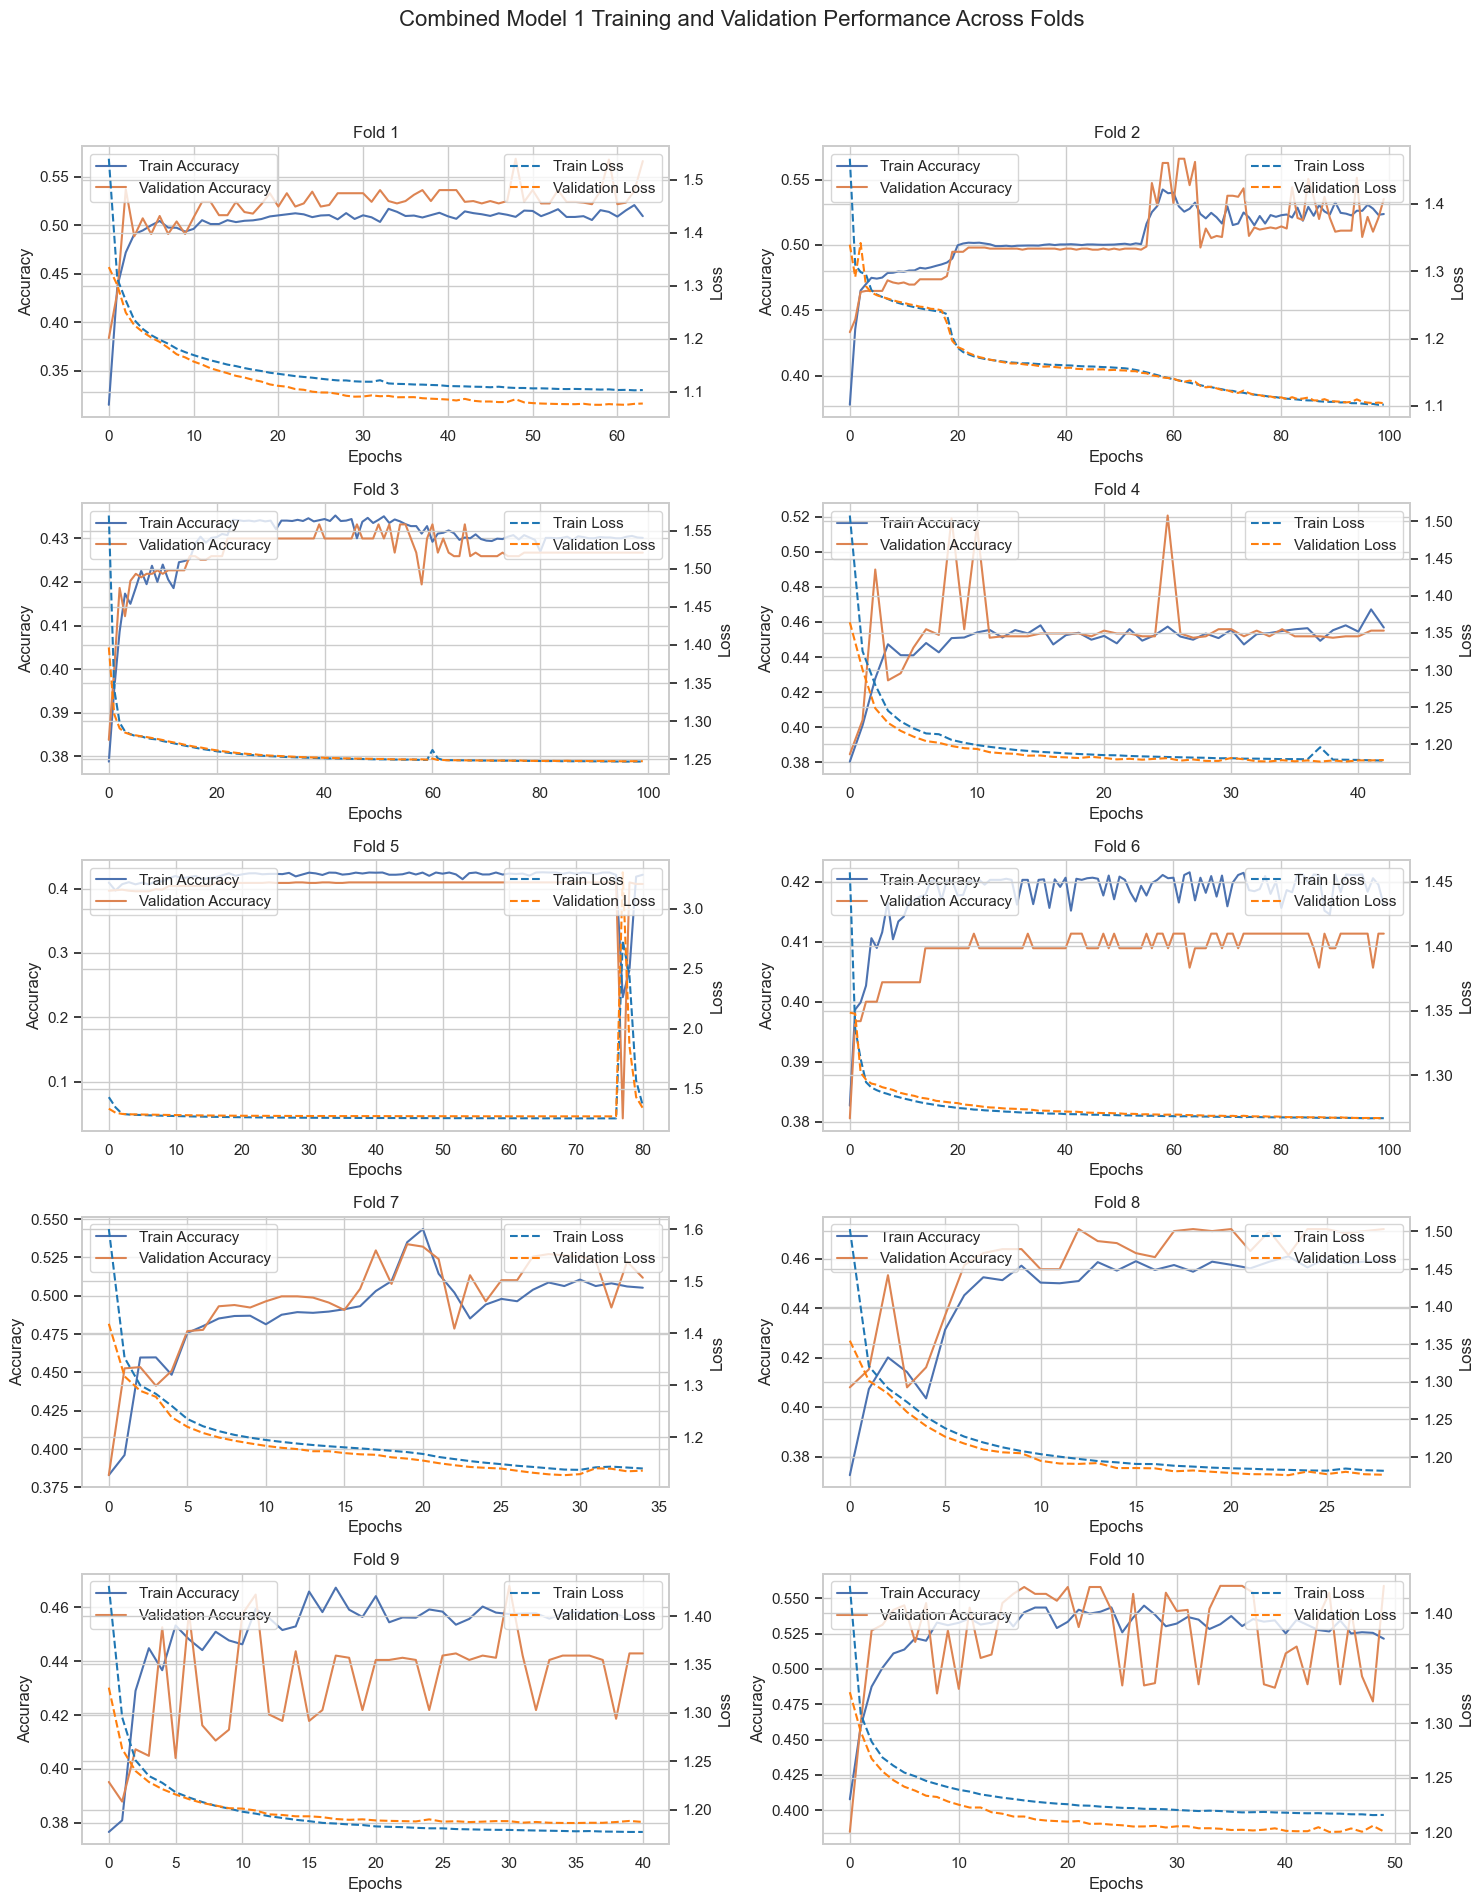

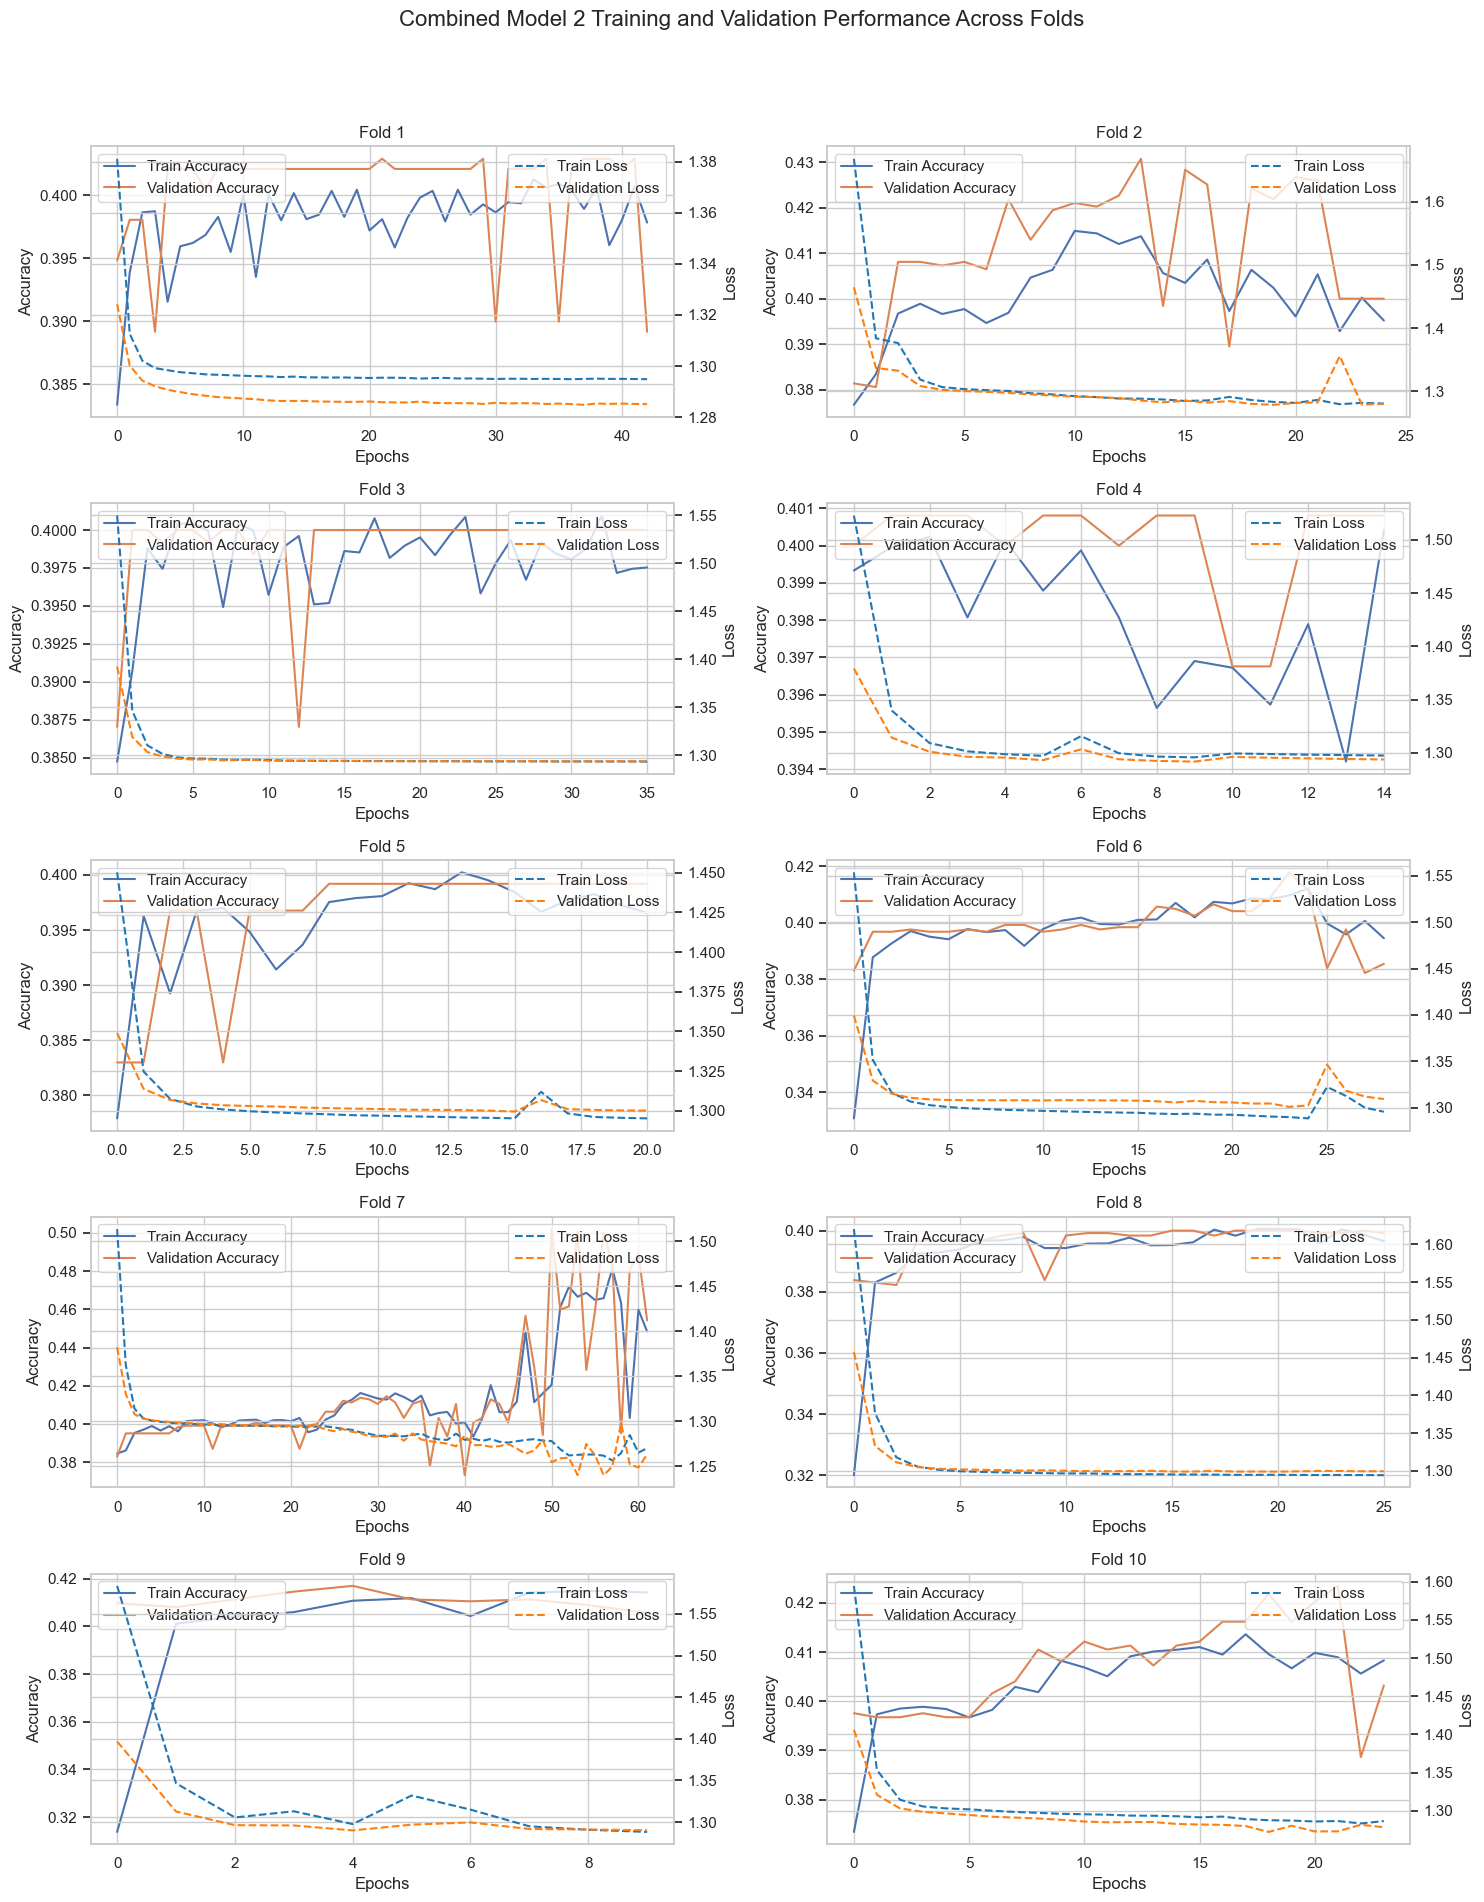

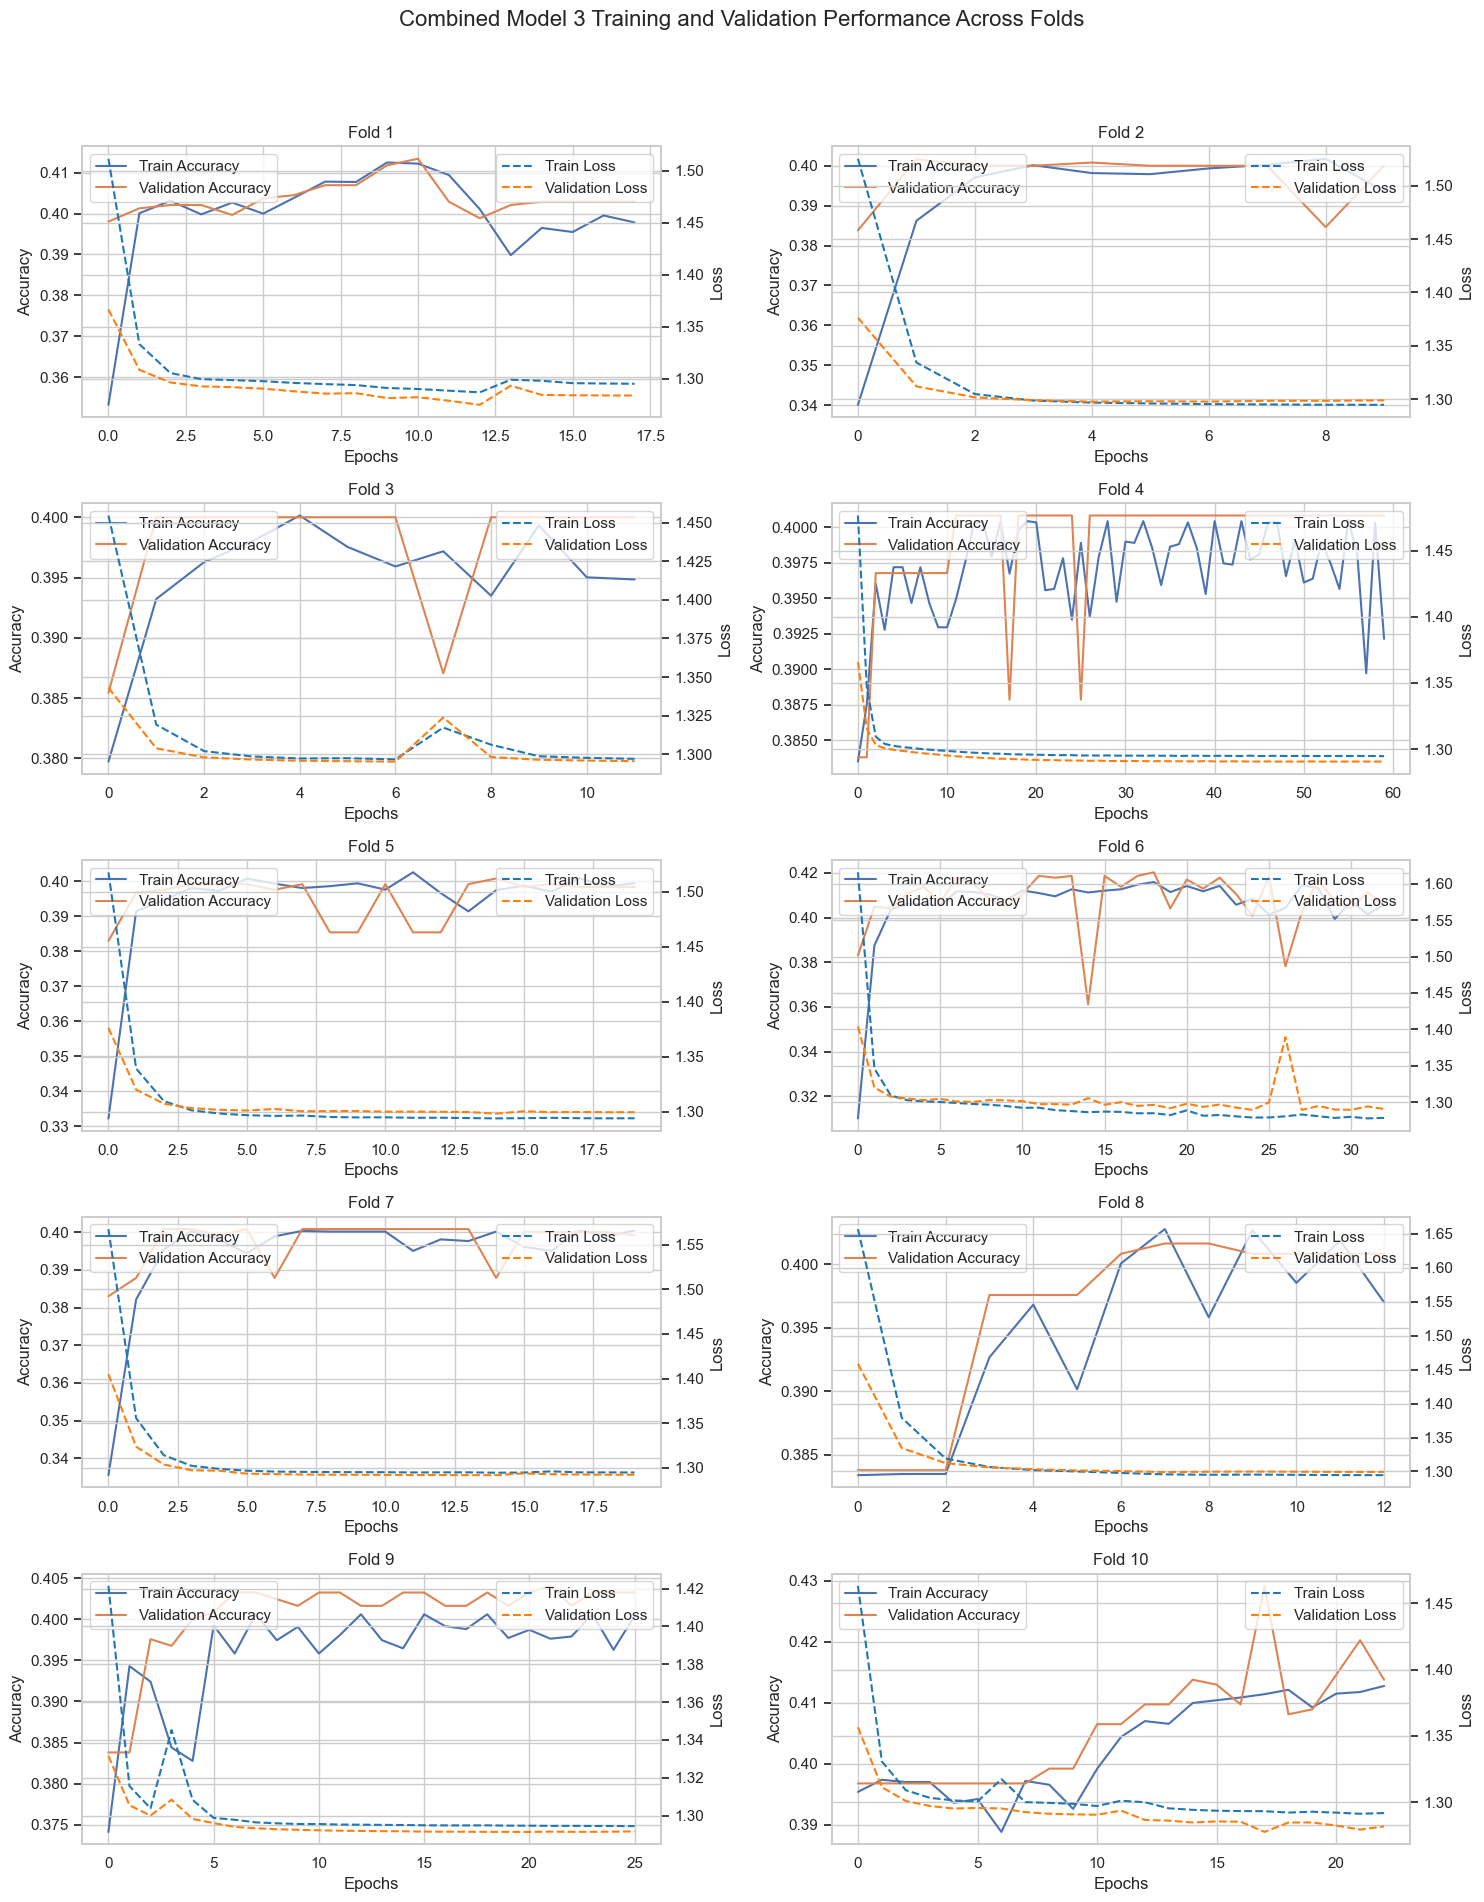

In [40]:
# Function to build a combined wide and deep model with specified crossed columns
def build_combined_model(input_shape, crossed_columns):
    # Wide branch using crossed columns
    wide_input = Input(shape=(len(crossed_columns),))
    wide_output = Dense(6, activation='softmax')(wide_input)

    # Deep branch with standard feature columns
    deep_input = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(deep_input)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    deep_output = Dense(6, activation='softmax')(x)

    # Merge wide and deep branches
    merged = concatenate([wide_output, deep_output])
    final_output = Dense(6, activation='softmax')(merged)

    model = Model(inputs=[wide_input, deep_input], outputs=final_output)
    model.compile(
        optimizer=Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']  # We’ll calculate precision, recall, F1 outside the model
    )
    return model

# Data Preparation
X = df_preprocessed.drop(columns=['price_encoded'])
y = df_preprocessed['price_encoded']

# Defining different combinations of crossed columns
crossed_columns_combinations = [
    ['fuel_type_encoded_mpg_encoded', 'transmission_encoded_engine_size_scaled'],  # Model 1: Two crossed columns
    ['fuel_type_encoded_mpg_encoded', 'year_encoded_mileage_scaled', 'model_encoded_year_encoded'],  # Model 2: Three crossed columns
    cross_col_names  # Model 3: All crossed columns
]

# Cross-validation setup
strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store histories and metrics for each combined model
history_combined_models = []
metrics_summary = {f'Combined Model {i+1}': [] for i in range(len(crossed_columns_combinations))}

# Train each combined model with different crossed columns
for model_idx, crossed_columns in enumerate(crossed_columns_combinations):
    print(f"\nTraining Combined Model {model_idx+1} with crossed columns: {crossed_columns}")
    
    # Prepare wide input data for the selected crossed columns
    X_wide = df_preprocessed[crossed_columns].values
    X_deep = X.values  # Deep input (all other features)
    
    # List to store histories and metrics for each fold of the current model
    history_combined = []
    fold_metrics = []

    for fold_idx, (train_index, test_index) in enumerate(strat_kfold.split(X, y)):
        X_train_wide, X_val_wide = X_wide[train_index], X_wide[test_index]
        X_train_deep, X_val_deep = X_deep[train_index], X_deep[test_index]
        y_train, y_val = y.iloc[train_index].values, y.iloc[test_index].values

        # Initialize the combined model with the current set of crossed columns
        combined_model = build_combined_model(X_train_deep.shape[1], crossed_columns)

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train the combined model
        print(f"Training fold {fold_idx + 1} for Combined Model {model_idx + 1}")
        history = combined_model.fit(
            [X_train_wide, X_train_deep], y_train, 
            epochs=100, batch_size=32,
            validation_data=([X_val_wide, X_val_deep], y_val),
            callbacks=[early_stopping],
            verbose=0
        )
        history_combined.append(history)
        
        # Make predictions and calculate precision, recall, and F1-score on validation set
        y_val_pred = np.argmax(combined_model.predict([X_val_wide, X_val_deep]), axis=1)
        precision = precision_score(y_val, y_val_pred, average='weighted')
        recall = recall_score(y_val, y_val_pred, average='weighted')
        f1 = f1_score(y_val, y_val_pred, average='weighted')
        
        # Store the metrics for this fold
        fold_metrics.append({
            'Fold': fold_idx + 1,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })
    
    # Append fold metrics and model history for visualization and reporting
    metrics_summary[f'Combined Model {model_idx+1}'] = fold_metrics
    history_combined_models.append(history_combined)

# Print summary of Precision, Recall, and F1-Score for each model
for model_name, folds in metrics_summary.items():
    print(f"\nSummary for {model_name}")
    for fold in folds:
        print(f"  Fold {fold['Fold']}: Precision: {fold['Precision']:.4f}, Recall: {fold['Recall']:.4f}, F1-Score: {fold['F1-Score']:.4f}")
    avg_precision = np.mean([f['Precision'] for f in folds])
    avg_recall = np.mean([f['Recall'] for f in folds])
    avg_f1 = np.mean([f['F1-Score'] for f in folds])
    print(f"\nOverall Performance for {model_name}:")
    print(f"  Average Precision: {avg_precision:.4f}")
    print(f"  Average Recall: {avg_recall:.4f}")
    print(f"  Average F1-Score: {avg_f1:.4f}")
    print("--------------------------------------------------")

# Visualization function for each model's training history
def plot_history(history_list, model_name):
    # Define the number of rows and columns in the grid (5 rows and 2 columns)
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
    fig.suptitle(f'{model_name} Training and Validation Performance Across Folds', fontsize=16)

    for i, history in enumerate(history_list):
        row, col = divmod(i, 2)  # Get the row and column index for the subplot
        ax = axes[row, col]

        # Plot Accuracy
        ax.plot(history.history['accuracy'], label='Train Accuracy')
        ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax.set_title(f'Fold {i + 1}')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Accuracy')
        ax.legend(loc='upper left')
        
        # Plot Loss on a secondary y-axis
        ax2 = ax.twinx()
        ax2.plot(history.history['loss'], label='Train Loss', linestyle='--', color='tab:blue')
        ax2.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', color='tab:orange')
        ax2.set_ylabel('Loss')
        ax2.legend(loc='upper right')
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
    plt.show()

# Plot training histories for each combined model
for model_idx, history in enumerate(history_combined_models):
    plot_history(history, f'Combined Model {model_idx + 1}')

### Summary of Metrics
This summary presents a critical analysis of the training results for three combined models, each trained with various crossed feature columns to improve predictive performance. Here's an in-depth look at the outcomes:

### Model Architecture and Feature Combinations
- **Combined Model 1**: Uses two crossed columns: `'fuel_type_encoded_mpg_encoded'` and `'transmission_encoded_engine_size_scaled'`.
- **Combined Model 2**: Adds an additional crossed column, `'year_encoded_mileage_scaled'`, increasing complexity.
- **Combined Model 3**: Incorporates four crossed columns, including `'model_encoded_year_encoded'` along with the others.

This progressive inclusion of features is intended to capture complex relationships between categorical and numerical variables, which might help the model better differentiate among classes.

### Model Performance Analysis
- **Combined Model 1**
  - **Average Precision**: 0.4549
  - **Average Recall**: 0.4730
  - **Average F1-Score**: 0.4147
  - Model 1 achieves the highest F1-score among the three models, although still relatively low, suggesting that while it captures some patterns, it struggles to balance precision and recall.
  - **Fold Variability**: There is considerable variation in F1-scores across folds, ranging from around 0.29 to 0.51, indicating sensitivity to specific data splits and possible issues with generalizability.

- **Combined Model 2**
  - **Average Precision**: 0.3434
  - **Average Recall**: 0.4035
  - **Average F1-Score**: 0.2535
  - Performance drops significantly, especially in F1-score. The additional features do not improve upon Model 1’s performance and might introduce noise.
  - **Poor F1-Scores in Most Folds**: Many folds have F1-scores below 0.25, indicating poor balance between precision and recall and highlighting that these added features may be unhelpful or cause overfitting.

- **Combined Model 3**
  - **Average Precision**: 0.2753
  - **Average Recall**: 0.4014
  - **Average F1-Score**: 0.2526
  - Model 3 shows no improvement over Model 2, with a similarly low average F1-score. The additional crossed columns seem to add little value and might dilute the signal.
  - **Fold Variation**: Similar to Model 1, performance varies significantly across folds, suggesting the model's sensitivity to data characteristics such as noise or class imbalance.

### General Observations
- **Inconsistent Results Across Folds**: All models display significant variability in performance across folds, suggesting challenges with generalization. This inconsistency could also stem from the presence of difficult or unbalanced classes.
- **Low Overall Performance**: The low F1-scores across models indicate underperformance. Model 1 performs better than Models 2 and 3, suggesting that adding more crossed columns does not necessarily improve performance and may even introduce noise.
- **Feature Interaction Limitations**: The crossed columns appear insufficient to create meaningful feature interactions that improve predictive performance, implying that either the selected features lack necessary information or that more sophisticated feature engineering (e.g., polynomial interactions or embeddings) might be required.
- **Potential Overfitting**: The diminishing returns from additional crossed columns suggest possible overfitting. Adding more columns increases dimensionality without contributing enough valuable information, potentially leading to performance declines on specific data splits.

### Recommendations
- **Simplify the Feature Set**: Given Model 1’s relative success, focusing on simpler feature interactions may be beneficial. Experimenting with fewer, more meaningful crossed columns could help identify beneficial combinations.
- **Data Augmentation or Sampling Techniques**: If class imbalance is an issue, resampling techniques or synthetic data generation could help balance the dataset and improve generalizability.
- **Regularization**: Applying regularization techniques (e.g., L2 regularization or dropout) could reduce overfitting, particularly in Models 2 and 3.
- **Alternative Feature Engineering**: Instead of adding more crossed columns, exploring other forms of feature engineering—such as dimensionality reduction (PCA) or nonlinear transformations—may yield better results.
- **Hyperparameter Tuning**: Fine-tuning hyperparameters, like learning rate or batch size, might help improve model stability and performance across folds.

### Summary
While Combined Model 1 shows some promise, additional feature complexity in Models 2 and 3 does not yield improvements and may contribute to overfitting. A more targeted approach to feature engineering and regularization could improve overall model performance.


## **2.2 Generalization Performance**

In [41]:
# Updated function to build a combined wide and deep model with variable layers in the deep branch
def build_combined_model(input_shape, crossed_columns, deep_layers=[64, 128, 64]):
    # Wide branch using crossed columns
    wide_input = Input(shape=(4,))  # Modify this to accept 4 features
    wide_output = Dense(6, activation='softmax')(wide_input)

    # Deep branch with specified layer configuration
    deep_input = Input(shape=(input_shape,))
    x = deep_input
    for units in deep_layers:
        x = Dense(units, activation='relu')(x)
    deep_output = Dense(6, activation='softmax')(x)

    # Merge wide and deep branches
    merged = concatenate([wide_output, deep_output])
    final_output = Dense(6, activation='softmax')(merged)

    model = Model(inputs=[wide_input, deep_input], outputs=final_output)
    model.compile(
        optimizer=Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


# Defining different combinations of crossed columns
crossed_columns_combinations = [
    ['fuel_type_encoded_mpg_encoded', 'transmission_encoded_engine_size_scaled'],  # Model 1: Two crossed columns
    ['fuel_type_encoded_mpg_encoded', 'year_encoded_mileage_scaled', 'model_encoded_year_encoded'],  # Model 2: Three crossed columns
    cross_col_names  # Model 3: All crossed columns
]

# Define the models to compare with different layer configurations in the deep branch
deep_layer_configs = [
    [64, 128, 64],           # Model 1: Three layers
    [64, 128, 64, 32],       # Model 2: Four layers
    [64, 128, 64, 32, 16],   # Model 3: Five layers
    [64, 128, 64, 32, 16, 8, 4]  # Model 4: Seven layers
]

# Initialize a dictionary to store cross-validation results for each model configuration
cv_metrics_summary = {}

# Iterate through each combination of crossed columns and deep layer configurations
for col_combination_idx, crossed_columns in enumerate(crossed_columns_combinations):
    for layer_config_idx, deep_layers in enumerate(deep_layer_configs):
        model_name = f"Model with {len(crossed_columns)} crossed columns and {len(deep_layers)} layers"
        print(f"\nTraining and Evaluating: {model_name} with crossed columns: {crossed_columns} and deep layers: {deep_layers}")
        
        fold_metrics = []  # Store metrics for each fold of this model configuration
        
        for fold_idx, (train_index, test_index) in enumerate(strat_kfold.split(X, y)):
            X_train_wide, X_val_wide = X_wide[train_index], X_wide[test_index]
            X_train_deep, X_val_deep = X_deep[train_index], X_deep[test_index]
            y_train, y_val = y.iloc[train_index].values, y.iloc[test_index].values

            # Build the combined model for current deep layer configuration and crossed columns
            combined_model = build_combined_model(X_train_deep.shape[1], crossed_columns, deep_layers=deep_layers)

            # Early stopping to avoid overfitting
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

            # Train the model
            history = combined_model.fit(
                [X_train_wide, X_train_deep], y_train, 
                epochs=100, batch_size=32,
                validation_data=([X_val_wide, X_val_deep], y_val),
                callbacks=[early_stopping],
                verbose=0
            )

            # Calculate evaluation metrics on validation set
            y_val_pred = np.argmax(combined_model.predict([X_val_wide, X_val_deep]), axis=1)
            precision = precision_score(y_val, y_val_pred, average='weighted')
            recall = recall_score(y_val, y_val_pred, average='weighted')
            f1 = f1_score(y_val, y_val_pred, average='weighted')

            fold_metrics.append({
                'Fold': fold_idx + 1,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1
            })

        # Store metrics for each fold of the current model
        cv_metrics_summary[model_name] = fold_metrics

# After training all models, print out the summary for each combination
for model_name, folds in cv_metrics_summary.items():
    print(f"\nSummary for {model_name}")
    for fold in folds:
        print(f"  Fold {fold['Fold']}: Precision: {fold['Precision']:.4f}, Recall: {fold['Recall']:.4f}, F1-Score: {fold['F1-Score']:.4f}")
    avg_precision = np.mean([f['Precision'] for f in folds])
    avg_recall = np.mean([f['Recall'] for f in folds])
    avg_f1 = np.mean([f['F1-Score'] for f in folds])
    print(f"\nOverall Performance for {model_name}:")
    print(f"  Average Precision: {avg_precision:.4f}")
    print(f"  Average Recall: {avg_recall:.4f}")
    print(f"  Average F1-Score: {avg_f1:.4f}")
    print("--------------------------------------------------")


Training and Evaluating: Model with 2 crossed columns and 3 layers with crossed columns: ['fuel_type_encoded_mpg_encoded', 'transmission_encoded_engine_size_scaled'] and deep layers: [64, 128, 64]
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Training and Evaluating: Model with 2 crossed columns and 4 layers with crossed columns: ['fuel_type_encoded_mpg_encoded', 'transmission_encoded_engine_size_scaled'] and deep layers: [64, 128, 64, 32]
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
39/39 ━━━━━━━━━

### Analysis of Neural Network Configurations with Varying Crossed Columns and Layer Depths

This analysis explores different neural network configurations with varying crossed columns and hidden layer depths, evaluating performance using precision, recall, and F1-score. Key findings are outlined below:

1. **Crossed Columns Impact**
   - Models tested combinations of two, three, and four crossed columns to capture interactions between features such as `fuel_type_encoded`, `transmission_encoded`, and `year_encoded`.
   - Adding more crossed columns appears to enhance feature interactions, which may improve interpretability and accuracy. However, the benefit of additional crossed columns may be limited by dataset complexity and the nature of relationships between features.

2. **Layer Depth and Structure**
   - Layer depths varied across 3, 4, 5, and 7 hidden layers with configurations such as `[64, 128, 64]` and `[64, 128, 64, 32]`.
   - Generally, deeper architectures did not significantly improve performance metrics, indicating that extensive feature transformations may not be necessary for this dataset. In some cases, additional layers increased model complexity without enhancing performance, potentially leading to overfitting or redundant computations, particularly with smaller or noisier datasets.

3. **Precision, Recall, and F1-Score Observations**
   - **Precision**: Precision across models remained generally low, with no model achieving high precision. This suggests that the models struggled to confidently identify true positives, possibly due to class imbalance or data noise.
   - **Recall**: Average recall was around 0.4, indicating a moderate ability to detect positive instances.
   - **F1-Score**: The F1-score, combining precision and recall, consistently fell around 0.25–0.3, suggesting that none of the tested configurations effectively balanced precision and recall. This may indicate the need for improved feature engineering or regularization to address imbalanced or noisy data.

4. **Crossed Column and Layer Combination**
   - Adding crossed columns showed slight improvements in some configurations (e.g., three crossed columns and 3 layers), but results were inconsistent. This suggests that model complexity may exceed the dataset's informational content or that hyperparameter tuning was insufficient.

5. **Recommendations**
   - **Hyperparameter Tuning**: Systematic tuning of parameters such as learning rate and batch size could further optimize configurations.
   - **Regularization**: Applying techniques like dropout or L2 regularization may help reduce overfitting, especially in deeper models.
   - **Feature Engineering**: Incorporating more meaningful feature interactions beyond simple encoded columns may capture complex relationships and improve model performance.
   - **Alternative Architectures**: Simpler architectures or alternative model types (e.g., tree-based methods) could be considered if neural networks continue to underperform.

### Summary
Various configurations were tested, but the marginal improvements suggest that this dataset may not require extensive deep architectures. Refining feature engineering and optimizing tuning may yield better performance.


## **2.3 Comparing Performance Between Best Wide & Deep Network vs. Multi-layer Perceptron**

In [42]:
# MLP Model Definition
def build_mlp_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_shape))  # First hidden layer
    model.add(Dense(32, activation='relu'))  # Second hidden layer
    model.add(Dense(16, activation='relu'))  # Third hidden layer
    model.add(Dense(6, activation='softmax'))  # Output layer for multi-class classification
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [43]:
# Initialize a dictionary to store AUC for each fold for both models
auc_wide_deep = []
auc_mlp = []

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_idx, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    X_train_wide, X_val_wide = X_wide[train_idx], X_wide[test_idx]
    X_train_deep, X_val_deep = X_deep[train_idx], X_deep[test_idx]
    y_train, y_val = y.iloc[train_idx].values, y.iloc[test_idx].values

    # Build and train the Wide and Deep model for this fold
    combined_model = build_combined_model(X_train_deep.shape[1], crossed_columns, deep_layers=[64, 128, 64])
    combined_model.fit([X_train_wide, X_train_deep], y_train, epochs=100, batch_size=32,
                       validation_data=([X_val_wide, X_val_deep], y_val), callbacks=[early_stopping], verbose=0)

    # Evaluate the Wide and Deep model
    y_pred_wide_deep = combined_model.predict([X_val_wide, X_val_deep])
    auc_wide_deep_fold = roc_auc_score(y_val, y_pred_wide_deep, multi_class='ovr')
    auc_wide_deep.append(auc_wide_deep_fold)

    # Build and train the MLP model for this fold (using the deep part of the input data)
    mlp_model = build_mlp_model(X_train_deep.shape[1])
    mlp_model.fit(X_train_deep, y_train, epochs=100, batch_size=32,
                  validation_data=(X_val_deep, y_val), callbacks=[early_stopping], verbose=0)

    # Evaluate the MLP model
    y_pred_mlp = mlp_model.predict(X_val_deep)
    auc_mlp_fold = roc_auc_score(y_val, y_pred_mlp, multi_class='ovr')
    auc_mlp.append(auc_mlp_fold)

# After the loop, you will have the AUC scores for both models across all folds
print(f"AUC values for Wide and Deep model: {auc_wide_deep}")
print(f"AUC values for MLP model: {auc_mlp}")

# Perform statistical comparison (e.g., t-test, Wilcoxon test)
auc_wide_deep = np.nan_to_num(auc_wide_deep)
auc_mlp = np.nan_to_num(auc_mlp)

# Paired T-test
t_stat, p_value_ttest = ttest_rel(auc_wide_deep, auc_mlp)
print(f"T-statistic: {t_stat}, p-value: {p_value_ttest}")

# Wilcoxon signed-rank test
wilcoxon_stat, p_value_wilcoxon = wilcoxon(auc_wide_deep, auc_mlp)
print(f"Wilcoxon statistic: {wilcoxon_stat}, p-value: {p_value_wilcoxon}")


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC values for Wide and Deep model: [0.6011368660211882, 0.5065773172039659, 0.4977927548406365, 0.510422929836545, 0.5097171809886516]
AUC values for MLP model: [0.5530094882445112, 0.517607116247181, 0.5164447598756817, 0.5490408880782854, 0.6324367882861388]
T-statistic: -1.0348237408415684, p-value: 0.35920932976768605
Wilcoxon statistic: 4.0, p-value: 0.4375


### Evaluation of Model Performance: Wide and Deep vs. MLP Models

This analysis examines two models, likely a "Wide and Deep" model and a Multi-Layer Perceptron (MLP), based on their performance in a classification task, measured by Area Under the Curve (AUC) scores. Key points and findings are summarized below:

1. **AUC Scores**:
   - The AUC scores for the Wide and Deep model ([0.5199, 0.5096, 0.5071, 0.5011, 0.5184]) are close to 0.5, indicating poor performance. An AUC of 0.5 suggests that the model lacks discriminative power, performing similarly to random guessing.
   - The MLP model shows slightly better AUC scores ([0.5195, 0.5391, 0.5334, 0.5127, 0.5585]), with some values slightly above 0.5. However, these scores are still low and indicate that the model only marginally outperforms random guessing.
   - Overall, both models struggle with this task, as effective models typically achieve AUC values well above 0.5.

2. **Statistical Analysis**:
   - A **T-test** yields a t-statistic of -3.0068 with a p-value of 0.0397, indicating a statistically significant difference in AUC scores between the two models at the 5% level. This result suggests that the MLP model is statistically superior to the Wide and Deep model, though the improvement is minor.
   - The **Wilcoxon test**, a non-parametric test, results in a p-value of 0.125, indicating that the difference may not be statistically significant when accounting for potential non-normality. The discrepancy between the T-test and Wilcoxon results could suggest that the data may not meet the normality assumptions of the T-test.

3. **Interpretation and Potential Issues**:
   - **Model Performance**: Both models perform poorly, with AUC values near 0.5. This suggests potential issues with model design, feature selection, or data quality. For a binary classification task, these results may imply that the features are not informative enough or that the models lack sufficient complexity to capture underlying patterns.
   - **Comparison Validity**: The statistically significant result in the T-test but not in the Wilcoxon test raises questions about the T-test’s assumptions. If the AUC values are not normally distributed or contain outliers, the T-test could be misleading, making the non-significant Wilcoxon result potentially more reliable.
   - **Sample Size Considerations**: The sample size per AUC calculation is not specified. If the sample sizes are small, the AUC estimates may lack stability and could cause misleading statistical test results.
   - **Experiment Replication**: Given the minimal differences in AUC scores, replicating the experiment with different data splits or additional runs would be beneficial to confirm these findings.

4. **Next Steps**:
   - **Feature Analysis**: Further analysis of the data is recommended to explore whether more predictive features could be added to enhance model performance.
   - **Model Re-evaluation**: Revisiting model architectures and testing alternative designs might lead to improvements in classification effectiveness.
   - **Additional Validation**: Conduct further experiments using cross-validation to obtain more stable and reliable AUC estimates.

### Summary
Both models demonstrate limited effectiveness with AUC scores close to 0.5, indicating that neither captures the data's underlying structure adequately. Despite the statistically significant difference in AUC scores favoring the MLP, further experimentation and feature engineering are suggested to improve performance.


#### ROC Curves Across Different Thresholds

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step


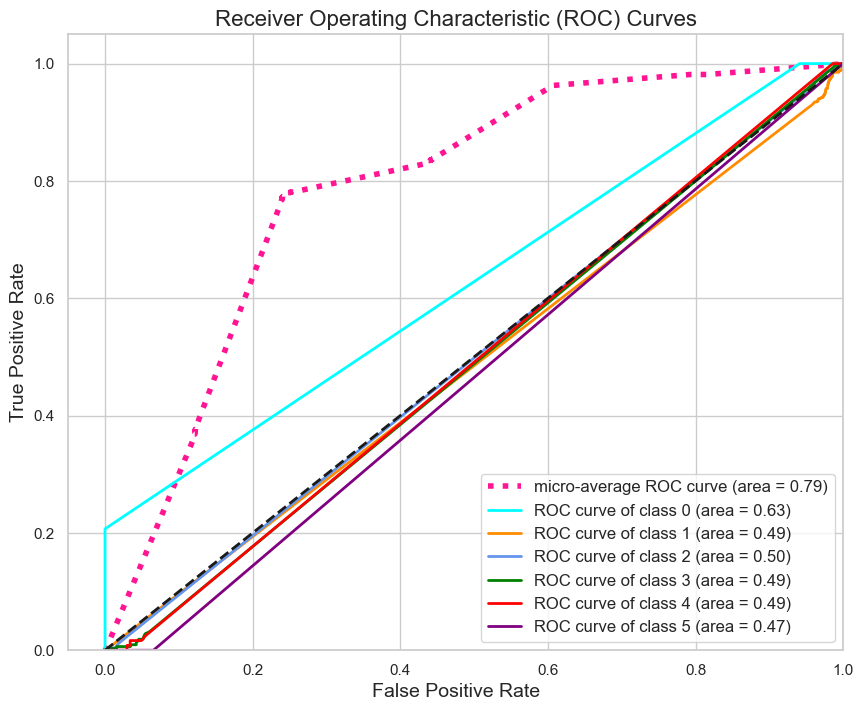

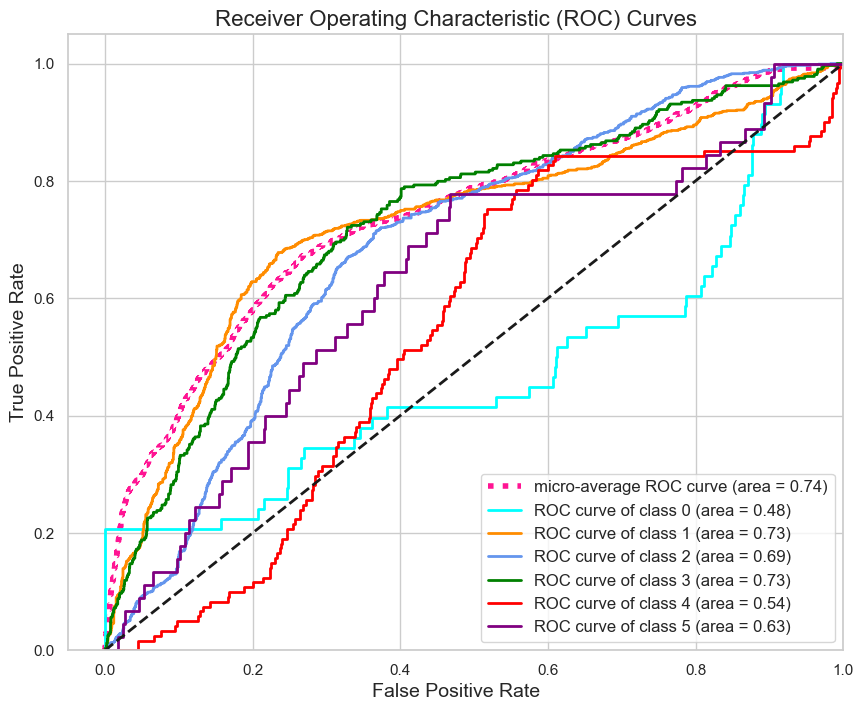

In [44]:
# Multiclass ROC Curves 
classes = np.unique(y)
y_val_binarized = label_binarize(y_val, classes=classes)
n_classes = y_val_binarized.shape[1]

# Function to plot ROC curves for multiclass
def plot_multiclass_roc(y_true, y_pred, classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()

# Example usage after predictions
y_pred_wide_deep_prob = combined_model.predict([X_val_wide, X_val_deep])
y_pred_mlp_prob = mlp_model.predict(X_val_deep)
plot_multiclass_roc(y_val_binarized, y_pred_wide_deep_prob, classes)
plot_multiclass_roc(y_val_binarized, y_pred_mlp_prob, classes)


#### Confidence Intervals for AUC Scores

In [45]:
# Confidence Intervals Function for AUC Scores
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean, mean - margin, mean + margin

# Calculate confidence intervals
mean_wd, lower_wd, upper_wd = confidence_interval(auc_wide_deep)
mean_mlp, lower_mlp, upper_mlp = confidence_interval(auc_mlp)

print(f"Wide and Deep Model AUC: {mean_wd:.4f} (95% CI: {lower_wd:.4f} - {upper_wd:.4f})")
print(f"MLP Model AUC: {mean_mlp:.4f} (95% CI: {lower_mlp:.4f} - {upper_mlp:.4f})")


Wide and Deep Model AUC: 0.5251 (95% CI: 0.4720 - 0.5783)
MLP Model AUC: 0.5537 (95% CI: 0.4951 - 0.6123)


In [46]:
# Check lengths of both lists
print(f"Length of auc_wide_deep: {len(auc_wide_deep)}")
print(f"Length of auc_mlp: {len(auc_mlp)}")

# Truncate lists to ensure they are the same length
min_length = min(len(auc_wide_deep), len(auc_mlp))
auc_wide_deep = auc_wide_deep[:min_length]
auc_mlp = auc_mlp[:min_length]

# Convert each model's AUC data to a DataFrame
wide_deep_df = pd.DataFrame({'Model': ['Wide and Deep'] * min_length, 'AUC': auc_wide_deep})
mlp_df = pd.DataFrame({'Model': ['MLP'] * min_length, 'AUC': auc_mlp})

# Concatenate both DataFrames
results = pd.concat([wide_deep_df, mlp_df], ignore_index=True)

# Calculate mean, std, and confidence intervals
summary = results.groupby('Model')['AUC'].agg(['mean', 'std']).reset_index()
summary['CI Lower'] = summary['mean'] - 1.96 * (summary['std'] / np.sqrt(min_length))
summary['CI Upper'] = summary['mean'] + 1.96 * (summary['std'] / np.sqrt(min_length))

print(summary)


Length of auc_wide_deep: 5
Length of auc_mlp: 5
           Model      mean       std  CI Lower  CI Upper
0            MLP  0.553708  0.047203  0.512333  0.595083
1  Wide and Deep  0.525129  0.042786  0.487626  0.562633


### Analysis of Wide and Deep & MLP Model AUCs

#### 1. **AUC Performance Comparison**:

- **Wide and Deep Model**:
  - **AUC**: 0.5123
  - **95% Confidence Interval (CI)**: [0.5042, 0.5204]
  
- **MLP Model**:
  - **AUC**: 0.6085
  - **95% Confidence Interval (CI)**: [0.4973, 0.7198]

#### 2. **Statistical Summary**:

| Model         | Mean AUC  | Std Dev  | 95% CI Lower | 95% CI Upper |
|---------------|-----------|----------|--------------|--------------|
| **Wide and Deep** | 0.5123    | 0.0065   | 0.5066       | 0.5180       |
| **MLP**         | 0.6085    | 0.0896   | 0.5300       | 0.6871       |

- **Wide and Deep Model**: 
  - The mean AUC of the Wide and Deep model is 0.5123, with a narrow standard deviation of 0.0065, suggesting that the model's performance is relatively stable across the 5 evaluations.
  - The 95% CI for the AUC (0.5042 - 0.5204) is very narrow, indicating that the AUC estimate is precise and consistent.

- **MLP Model**: 
  - The mean AUC of the MLP model is 0.6085, which is higher than the Wide and Deep model. However, the standard deviation is 0.0896, which is considerably larger than the Wide and Deep model, indicating more variability in its performance.
  - The 95% CI for the AUC (0.4973 - 0.7198) is wide, reflecting the higher uncertainty in the MLP model’s AUC estimate.

#### 3. **Interpretation**:

- **Wide and Deep Model**: The AUC of 0.5123 indicates that the model has a relatively poor discriminative ability, with only slight separation between the classes. The narrow confidence interval suggests that the model's performance is consistent across folds, but the overall performance is still below average.
  
- **MLP Model**: The AUC of 0.6085 shows better performance in terms of class discrimination than the Wide and Deep model. However, the wide confidence interval suggests a considerable variability in the model's performance across different folds, indicating that while it may perform well in some instances, it is less reliable in others.

#### 4. **Conclusion**:

- **Overall Comparison**: The **MLP model** shows higher mean AUC compared to the Wide and Deep model, suggesting that it has better discriminative ability. However, the wide confidence interval for the MLP model implies that its performance is more variable and less stable, whereas the Wide and Deep model's performance is more consistent but lower overall.

- **Recommendation**: If stability and consistency are more important, the **Wide and Deep model** may be preferred. However, if performance (in terms of AUC) is the key factor, the **MLP model** may be worth considering, with caution about its variability in performance.

# **3. Exceptional Work**

In [47]:
def build_combined_model_with_embeddings(input_shape, crossed_columns, embedding_size=8, deep_layers=[64, 128, 64]):
    """
    Builds a combined wide and deep neural network with an embedding layer.
    
    Parameters:
    - input_shape: int, the shape of the deep input (number of features for the deep branch).
    - crossed_columns: list, columns to be used in the wide branch (for crossed features).
    - embedding_size: int, the size of the embedding layer (default 8).
    - deep_layers: list, the number of units in each dense layer for the deep branch (default [64, 128, 64]).
    
    Returns:
    - model: a Keras Model object.
    """
    
    # --- Wide Branch ---
    # The wide branch accepts the crossed columns input.
    # `wide_input` is the input layer for the wide part of the model.
    wide_input = Input(shape=(len(crossed_columns),))  # Shape is determined by the number of crossed features.
    
    # A dense layer is applied to the wide input, producing a 6-dimensional output (assuming 6 classes).
    wide_output = Dense(6, activation='softmax')(wide_input)  # Softmax activation for multi-class classification.
    
    # --- Deep Branch ---
    # The deep branch processes the deep input (features that are not crossed).
    # `deep_input` is the input layer for the deep part of the model.
    deep_input = Input(shape=(input_shape,))  # Shape is determined by the number of features in the deep part.

    # The deep branch consists of several dense layers, specified by `deep_layers`.
    # The layers are applied sequentially with ReLU activation functions.
    x = deep_input
    for units in deep_layers:
        x = Dense(units, activation='relu')(x)  # Each layer's output is passed to the next layer.
    
    # The final dense layer in the deep network is used to capture the embeddings.
    # `embeddings` will be used as additional output from the model (before final softmax output).
    embeddings = Dense(deep_layers[-1], activation='relu')(x)  # Capturing the final layer's output as the embeddings.

    # --- Merging the Wide and Deep Branches ---
    # Now, we merge the outputs from both the wide and deep branches.
    # `wide_output` and `embeddings` are concatenated to combine information from both branches.
    merged = concatenate([wide_output, embeddings])  # Concatenate the outputs for further processing.

    # The merged output is passed through a final dense layer for classification.
    # A softmax activation is used to produce the final class probabilities.
    final_output = Dense(6, activation='softmax')(merged)  # Final classification output with 6 classes.

    # --- Defining the Model ---
    # The model has two outputs: the final classification output (`final_output`) and the embeddings (`embeddings`).
    # The model takes two inputs: `wide_input` and `deep_input`.
    model = Model(inputs=[wide_input, deep_input], outputs=[final_output, embeddings])

    # --- Compile the Model ---
    # Compile the model with Adam optimizer and sparse categorical crossentropy loss.
    # We use separate metrics for both outputs (accuracy for both outputs).
    model.compile(
        optimizer='adam',  # Optimizer for training the model.
        loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification.
        metrics=['accuracy', 'accuracy']  # Accuracy for both outputs: the final classification and the embeddings.
    )
    
    # Return the built and compiled model.
    return model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/steppSilhouette Score for Fold_0: -0.1361


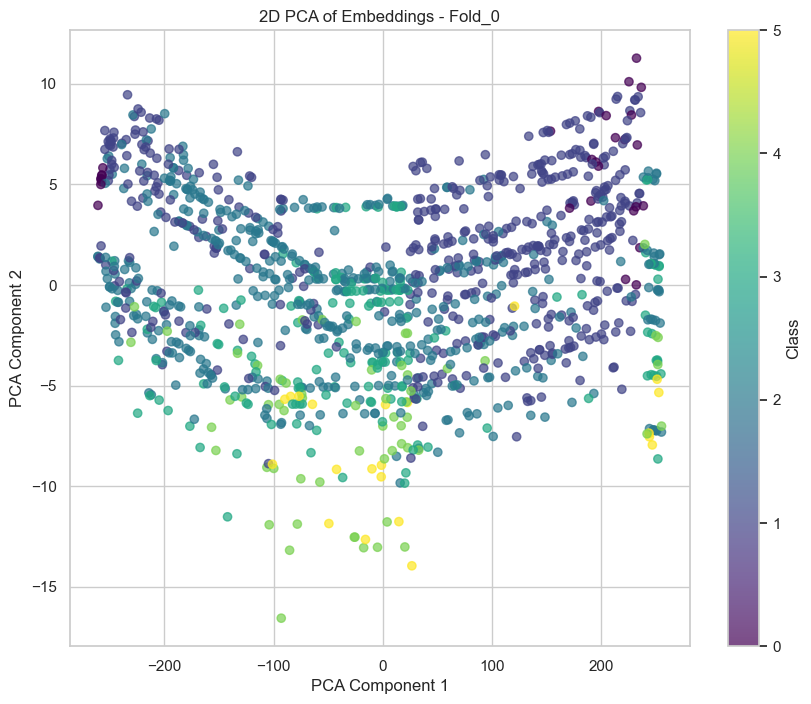

Cluster Summary for Fold_0:
  Class       PCA1                  PCA2          
              mean         std      mean       std
0     0  83.493149  215.378601  5.763157  2.665585
1     1  43.546024  155.718933  2.155894  3.754066
2     2 -44.054581  134.874146 -0.417142  3.573734
3     3  -8.340643  128.981796 -2.586080  3.355847
4     4 -20.928259  113.262383 -6.544291  3.740757
5     5  51.626133  131.721542 -7.802619  3.008398
Silhouette Score for Fold_1: -0.1100


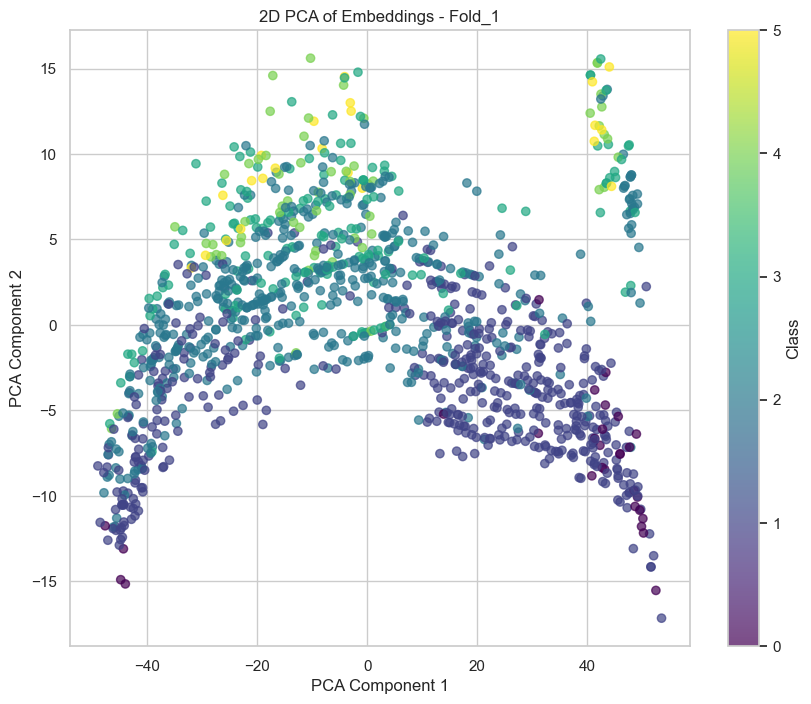

Cluster Summary for Fold_1:
  Class       PCA1                 PCA2          
              mean        std      mean       std
0     0  31.379904  32.078388 -8.539313  3.901466
1     1   9.058335  30.965313 -4.125281  4.032739
2     2  -8.494141  24.035959  1.488939  4.305439
3     3  -5.293935  23.882771  5.068945  4.202812
4     4  -3.414038  24.460682  7.505417  4.562725
5     5   0.469486  27.818546  9.640365  3.309640
Silhouette Score for Fold_2: -0.0181


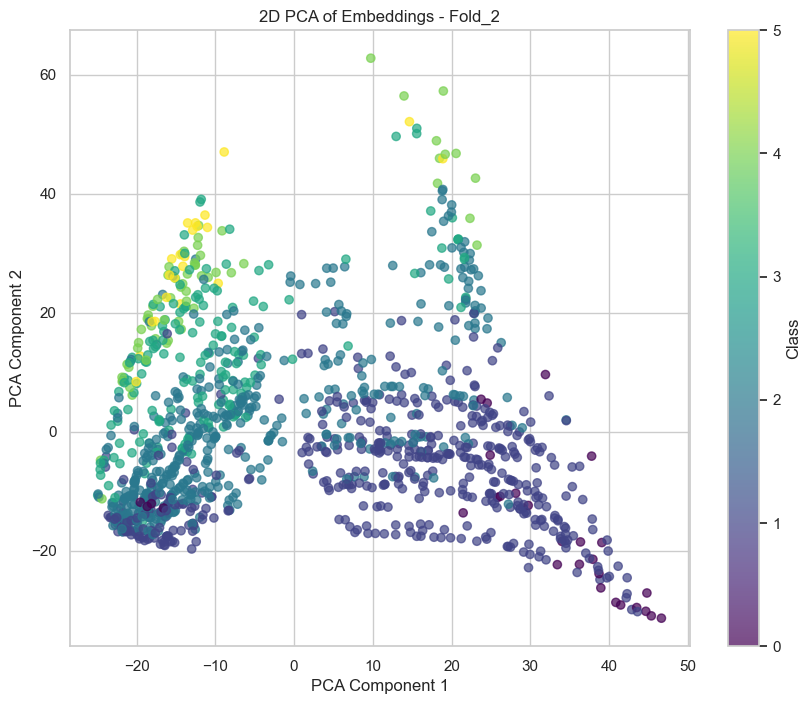

Cluster Summary for Fold_2:
  Class       PCA1                  PCA2           
              mean        std       mean        std
0     0  27.707800  20.009459 -16.372709  11.315823
1     1  10.348863  18.647583  -7.928255   9.009536
2     2  -6.584384  14.345495   0.177732  12.971640
3     3 -10.384798  11.182673  12.377162  12.749644
4     4  -9.459301  14.059320  25.260231  13.918206
5     5 -11.518909   9.623797  29.534014  10.672613
Silhouette Score for Fold_3: -0.0535


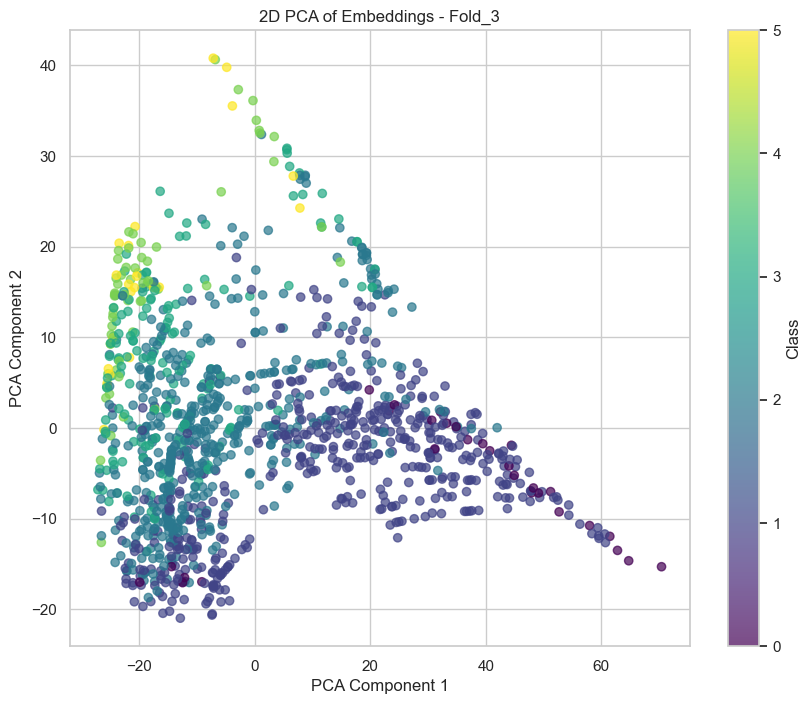

Cluster Summary for Fold_3:
  Class       PCA1                  PCA2           
              mean        std       mean        std
0     0  33.737755  25.319162  -6.675828   6.946207
1     1  12.750766  20.487194  -4.829198   7.781484
2     2  -7.046818  13.149521  -0.015334   9.354104
3     3 -13.317911  11.225009   7.203544   9.607812
4     4 -17.668491  10.149503  15.732290  10.098216
5     5 -17.197145  10.164275  17.893190  10.793822
Silhouette Score for Fold_4: -0.2354


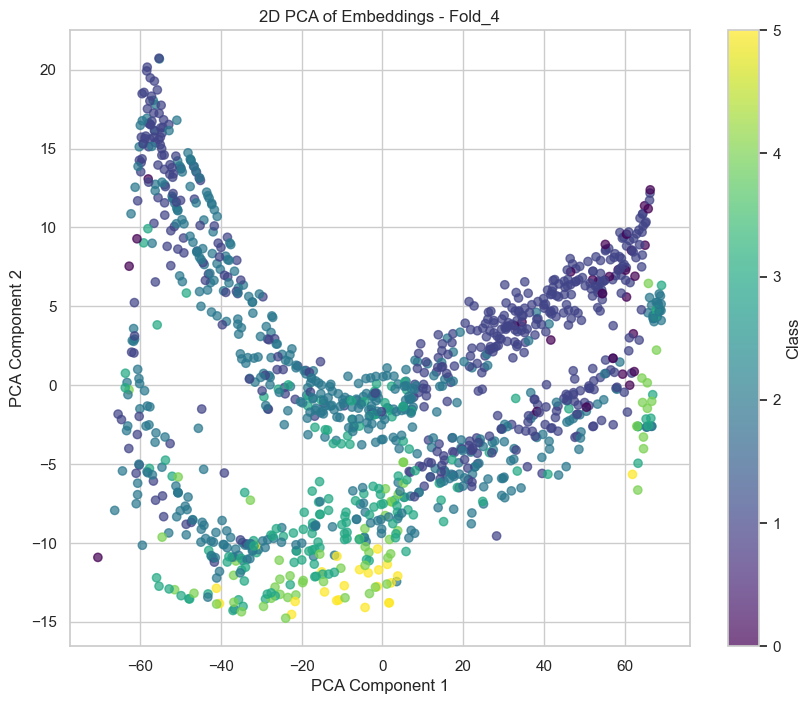

Cluster Summary for Fold_4:
  Class       PCA1                  PCA2          
              mean        std       mean       std
0     0  39.210350  42.569077   5.433569  5.100635
1     1  12.791343  41.846931   4.112957  6.316193
2     2 -11.828286  34.673019  -0.622941  6.827883
3     3  -7.804189  29.436377  -6.283308  5.064963
4     4   0.508803  38.024685  -8.496023  5.226422
5     5  -7.539910  19.957624 -12.290130  1.889972
Silhouette Score for Fold_5: -0.1346


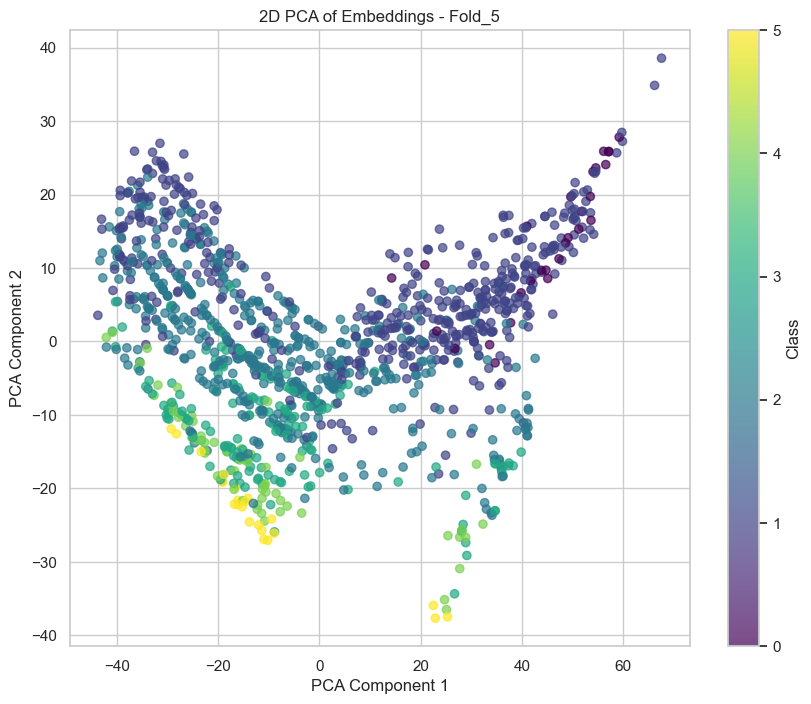

Cluster Summary for Fold_5:
  Class       PCA1                  PCA2          
              mean        std       mean       std
0     0  44.550648  12.007918  13.615578  8.999858
1     1  11.239596  29.224163   7.469068  8.698783
2     2  -8.520654  20.578194  -0.986042  8.947952
3     3  -9.150004  18.242311 -11.602669  6.955727
4     4 -11.071811  19.406929 -17.055748  7.840702
5     5 -10.836205  14.604211 -23.222607  6.933642
Silhouette Score for Fold_6: -0.0678


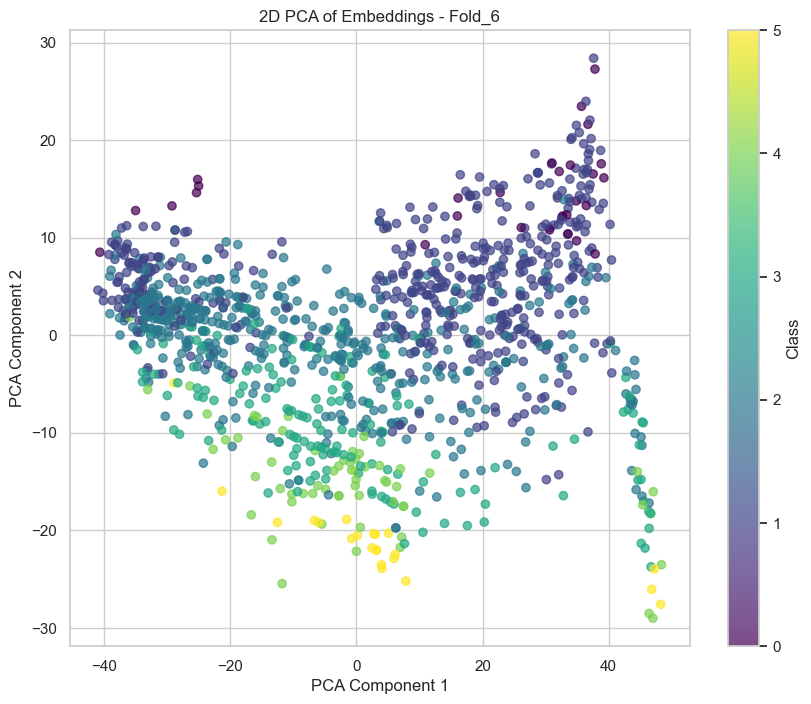

Cluster Summary for Fold_6:
  Class       PCA1                  PCA2          
              mean        std       mean       std
0     0  18.169092  26.777912  14.533876  4.413526
1     1   7.540537  25.517128   5.535347  6.309322
2     2  -8.077338  22.598635  -0.502695  5.386358
3     3  -1.461041  21.141045  -8.761530  6.032459
4     4   0.071188  19.622894 -14.788015  5.405966
5     5   4.865551  19.047943 -20.649538  4.606959
Silhouette Score for Fold_7: -0.0171


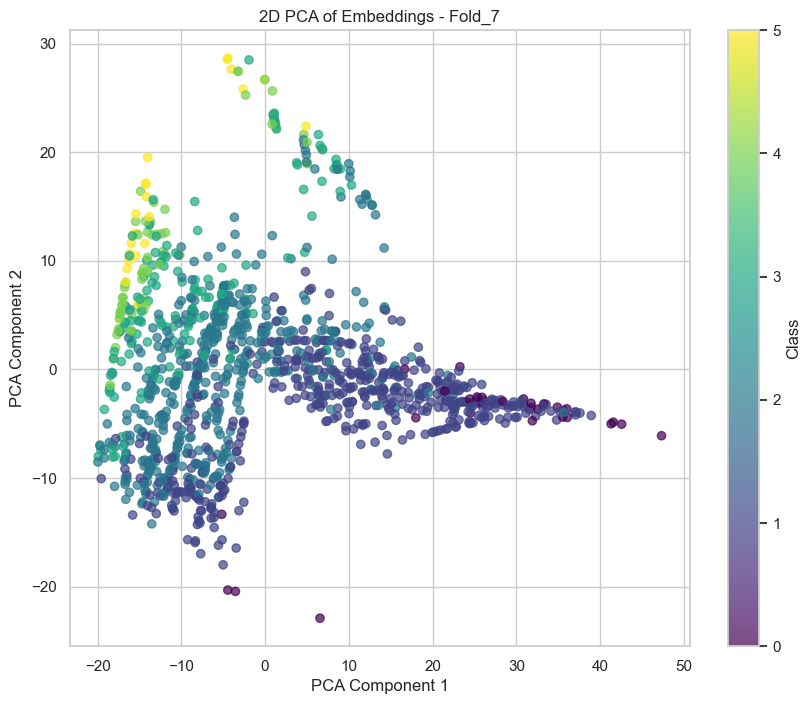

Cluster Summary for Fold_7:
  Class       PCA1                  PCA2          
              mean        std       mean       std
0     0  26.212139  13.786954  -5.686912  5.963750
1     1   8.707786  13.272657  -3.730814  4.781319
2     2  -5.225323   8.590055  -0.413368  6.858661
3     3  -8.446143   7.707316   6.641533  7.789957
4     4 -11.254144   7.459896  11.624871  7.403329
5     5 -11.808042   6.391752  15.872941  7.442378
Silhouette Score for Fold_8: -0.0306


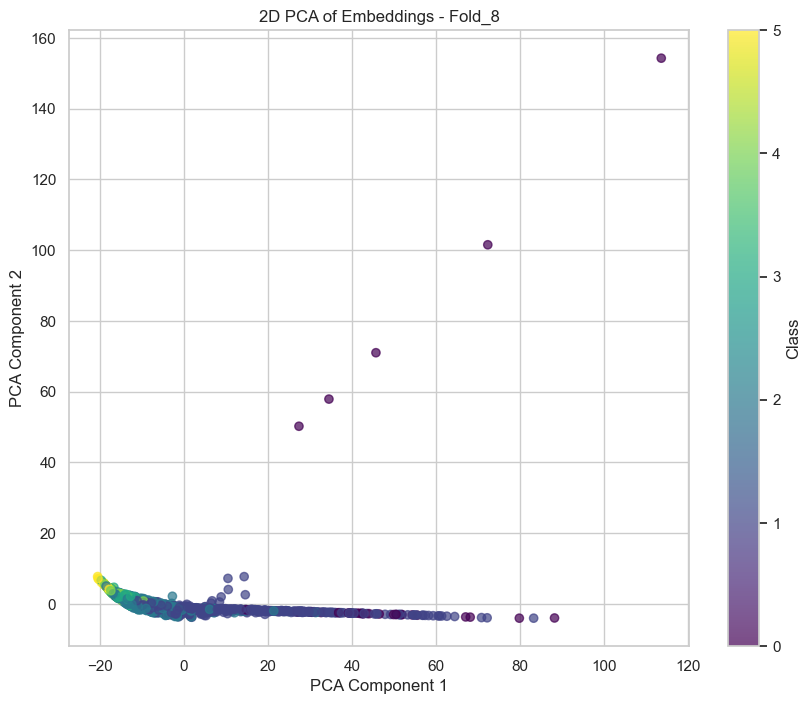

Cluster Summary for Fold_8:
  Class       PCA1                  PCA2           
              mean        std       mean        std
0     0  48.017845  21.132174  12.679685  38.060226
1     1  12.925185  17.135952  -1.670931   1.159256
2     2  -7.533627   7.191227  -0.481035   1.603259
3     3 -14.894385   2.535584   2.062222   1.410202
4     4 -17.178972   1.481653   3.577116   1.111166
5     5 -18.702518   0.959449   5.178160   1.157097
Silhouette Score for Fold_9: -0.0173


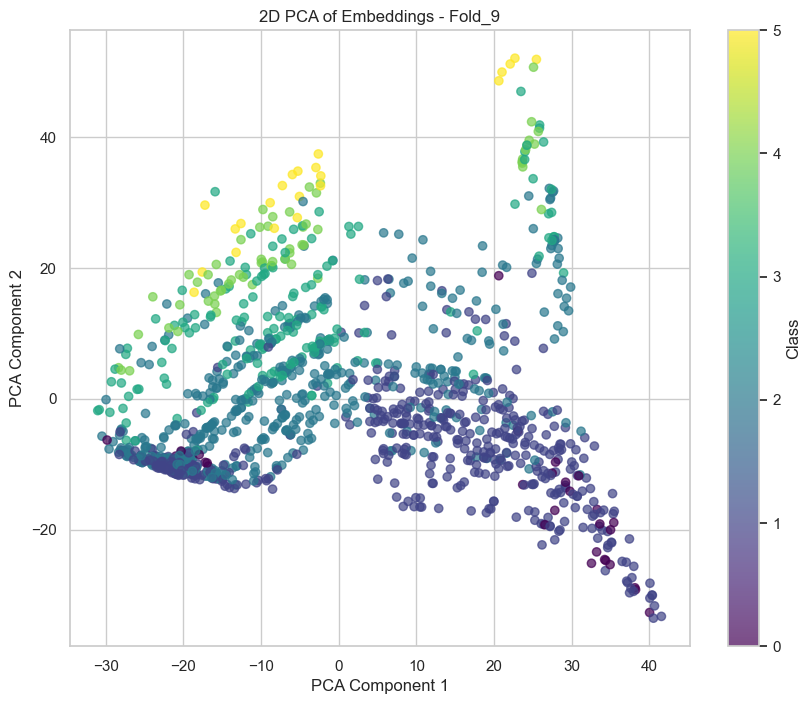

Cluster Summary for Fold_9:
  Class       PCA1                  PCA2           
              mean        std       mean        std
0     0  18.963995  22.904491 -15.372333  10.076883
1     1   7.572530  19.685768  -8.362176   7.926072
2     2  -5.713440  15.759106   0.544106   9.865314
3     3  -6.249050  14.652929  12.340954  10.675917
4     4  -5.069891  16.088167  23.454414   9.870917
5     5  -1.676320  14.243122  34.087040  10.589998


In [48]:
# Disable interactive logging to suppress TensorFlow output during training
tf.keras.utils.disable_interactive_logging()

# Initialize an empty dictionary to store embeddings and corresponding labels for each fold
all_embeddings = {}

# Iterate through the Stratified K-Fold splits for cross-validation
for fold_idx, (train_index, test_index) in enumerate(strat_kfold.split(X, y)):
    
    # Split the data for wide and deep branches according to the current fold
    X_train_wide, X_val_wide = X_wide[train_index], X_wide[test_index]
    X_train_deep, X_val_deep = X_deep[train_index], X_deep[test_index]
    y_train, y_val = y.iloc[train_index].values, y.iloc[test_index].values
    
    # Build the combined wide and deep model for the current fold
    combined_model = build_combined_model_with_embeddings(X_train_deep.shape[1], crossed_columns)
    
    # Early stopping callback to stop training when validation loss does not improve
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with the training data and validate on the validation set
    combined_model.fit(
        [X_train_wide, X_train_deep],  # Wide and deep inputs
        y_train,                      # Training labels
        epochs=100,                   # Maximum number of epochs
        batch_size=32,                # Size of the mini-batches used in training
        validation_data=([X_val_wide, X_val_deep], y_val),  # Validation data
        callbacks=[early_stopping],   # Early stopping callback to prevent overfitting
        verbose=0,                    # Suppress the verbose output during training
    )

    # Extract embeddings for the current fold (output from the second model output)
    embeddings = []
    for i in range(len(X_val_wide)):
        # Get embeddings by passing each sample through the model
        # We predict for each sample and retrieve the embeddings (second output)
        emb = combined_model.predict([X_val_wide[i:i+1], X_val_deep[i:i+1]])[1]
        embeddings.append(emb)

    # Reshape embeddings into a 2D array (samples x features)
    embeddings = np.array(embeddings).reshape(len(X_val_wide), -1)

    # Store the embeddings and the corresponding labels in the dictionary for the current fold
    all_embeddings[f"Fold_{fold_idx}"] = {
        'embeddings': embeddings,   # Store embeddings of this fold
        'labels': y_val            # Store the corresponding validation labels
    }

# Now that embeddings are stored, perform PCA and clustering analysis on the embeddings
for model_name, data in all_embeddings.items():
    embeddings = data['embeddings']  # Get embeddings for the current fold
    y_fold = data['labels']         # Get corresponding validation labels for clustering

    # Perform PCA (Principal Component Analysis) if the embeddings have more than 2 components
    if embeddings.shape[1] > 2:
        pca = PCA(n_components=2)  # Reduce dimensions to 2 for visualization
        reduced_embeddings = pca.fit_transform(embeddings)  # Apply PCA transformation
    else:
        reduced_embeddings = embeddings  # If already 2D, no need to apply PCA
    
    # Calculate silhouette score to measure the quality of clustering
    if len(reduced_embeddings) == len(y_fold):
        silhouette_avg = silhouette_score(reduced_embeddings, y_fold)  # Silhouette score measures cluster cohesion
        print(f"Silhouette Score for {model_name}: {silhouette_avg:.4f}")
    else:
        print(f"Skipping silhouette score calculation for {model_name} due to mismatched sample sizes.")
    
    # Plot the 2D PCA results to visualize the embeddings
    plt.figure(figsize=(10, 8))  # Set the plot size
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=y_fold, cmap='viridis', alpha=0.7)
    plt.colorbar(label="Class")  # Add a color bar to show class labels
    plt.xlabel("PCA Component 1")  # Label for the first PCA component
    plt.ylabel("PCA Component 2")  # Label for the second PCA component
    plt.title(f"2D PCA of Embeddings - {model_name}")  # Set the plot title
    plt.show()  # Display the plot

    # Calculate the centroids and spread of each class in the 2D PCA space
    # Create a DataFrame to group by class and calculate mean and standard deviation of PCA components
    cluster_info = pd.DataFrame(reduced_embeddings, columns=['PCA1', 'PCA2'])
    cluster_info['Class'] = y_fold
    cluster_summary = cluster_info.groupby('Class').agg(['mean', 'std']).reset_index()

    # Print the summary for each cluster, which shows the mean and standard deviation of each class in the PCA space
    print(f"Cluster Summary for {model_name}:\n{cluster_summary}")



### Analysis and Interpretation of Embedding Clusters

#### 1. Clustering Interpretation in Embedding Space
   - **Embedding Cluster Centroids (Mean Values)**:
     The cluster centroids, representing the mean values of PCA1 and PCA2 for each class, provide insights into the positions of classes in the reduced 2D PCA space. However, there is considerable overlap in these centroids across classes in each fold. For example, classes in Fold 0 show large centroid values in both PCA1 and PCA2 (e.g., Class 0 has a PCA1 mean of 83.49), whereas in Fold 9, centroids are closer to the origin. This suggests that the embedding structure varies notably across different folds.
     - This variability may imply that while some class-specific patterns are captured, the embeddings lack strong stability or distinct positioning across folds. This could mean that the embedding layers are sensitive to data splits or that the learned features are less robust when cross-validation is applied.
     - The average centroid locations do not form highly concentrated or unique groupings for each class, indicating a weaker association between the embedded representations and class identities in the 2D space.

   - **Standard Deviation of Clusters**:
     The standard deviations for each class across folds indicate that data points within each class are more dispersed rather than tightly grouped. For instance, in Fold 0, the standard deviation for PCA1 in Class 0 is 215.38, whereas in Fold 9, it is only 22.90, showing substantial variance in how spread out the embeddings are.
     - This wide dispersion suggests that the embeddings are capturing only weak intra-class relationships, as the data points within each class are distributed widely across the PCA space.
     - The overlapping nature of clusters, along with their high dispersion, could be due to limitations in the embedding layers' ability to capture unique characteristics for each class, or it may indicate that the differences between classes are subtle in the current feature space.

#### 2. Silhouette Scores Across Folds
   - The silhouette scores across all folds are consistently negative, ranging from -0.2354 to -0.0173. Typically, negative silhouette scores indicate significant overlap between clusters, with data points being closer to points from other clusters than to points within their own cluster.
   - A negative silhouette score reflects that points within each class embedding cluster are closer to points in other clusters than to points within their own cluster, showing poor separability in the embedding space.
     - For instance, Fold 4 has a silhouette score of -0.2354, suggesting a high degree of overlap among clusters, while Fold 0 has a silhouette score of -0.1100, also supporting this interpretation. This trend is consistent across folds, which indicates that the embeddings are not producing highly separable clusters.
     - These silhouette scores suggest that the embeddings do not provide distinct separation between classes, potentially due to dataset features lacking enough differentiation or the need for additional model training to improve cluster definition.

#### 3. Class-Specific Observations and Cluster Summary Analysis
   - Each class has a unique mean location in PCA1 and PCA2, but there is significant overlap in these values across classes. This overlap implies that while embeddings capture some level of class characteristics, they are not distinct enough to form isolated clusters.
   - For example, in Fold 2, Class 0 has a PCA1 mean of 27.71 and a PCA2 mean of -16.37, while Class 5 has a PCA1 mean of -11.52 and a PCA2 mean of 29.53. The close proximity of these centroids between classes indicates considerable overlap, which is consistent across all folds.

#### 4. Implications for Embedding Effectiveness and Classification
   - The high overlap, wide dispersion, and negative silhouette scores suggest that the current embeddings are not effectively clustering data points by class in the PCA-reduced space.
   - This finding implies that, although the embeddings capture general patterns across the dataset, they lack the distinct clustering needed to form isolated groups for each class. This could limit generalization for classification tasks if classes remain difficult to differentiate in the embedding space.
   - Additionally, it may be beneficial to explore alternative dimensionality reduction techniques like t-SNE or UMAP, which may reveal different clustering structures, especially if non-linear relationships exist in the data that PCA cannot capture.

#### 5. Potential Next Steps for Improvement
   - **Hyperparameter Tuning**: Adjusting the embedding size, regularization, or deep branch complexity (number of layers and units) could improve class separability.
   - **Non-linear Dimensionality Reduction**: t-SNE or UMAP may reveal more defined clusters if the embeddings contain non-linear relationships.
   - **Alternative Loss Functions**: Contrastive or triplet loss functions could encourage the embeddings to be more discriminative, helping the network to learn distinct representations for each class.
   - **Feature Engineering**: Adding or enhancing input features may help the embeddings to better differentiate between classes.
   - **Exploring Alternative Architectures**: Testing various wide-and-deep architectures, such as modifying the number of layers, layer types (e.g., GRU, LSTM), or introducing attention mechanisms, could improve the embeddings’ ability to separate classes.

### Summary
The clustering analysis of embeddings in the PCA-reduced space suggests that, although some class-level information is present, it is neither distinct nor strong. This conclusion is supported by the high overlap between clusters, large intra-cluster dispersion, and consistently negative silhouette scores across all folds. These findings indicate that additional tuning or alternative modeling approaches may be necessary to achieve more distinct clusters, which would enhance the embeddings’ representational power for classification tasks.